# Data Processing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None # Pretty sure this will come back to stab me in the back
%config InlineBackend.figure_format = 'retina' # Higher quality images for slides

githubrepo = 'https://raw.githubusercontent.com/joedav98/SC1015_SC18_SpotifyRepo/main/data/'

In [2]:
def converttonumeric(final):
  final.danceability = pd.to_numeric(final.danceability)
  final.energy = pd.to_numeric(final.energy)
  final.loudness = pd.to_numeric(final.loudness)
  final.speechiness = pd.to_numeric(final.speechiness)
  final.acousticness = pd.to_numeric(final.acousticness)
  final.liveness = pd.to_numeric(final.liveness)
  final.valence = pd.to_numeric(final.valence)
  final.tempo = pd.to_numeric(final.tempo)
  final.duration_ms = pd.to_numeric(final.duration_ms)
  final.year = pd.to_numeric(final.year)
# Function to convert all values to numeric


def convertKeytoCat(df):
  df['key'] = df['key'].replace({
      0 : 'C', 
      1 : 'C#/Db', 
      2 : 'D', 
      3 : 'D#/Eb', 
      4 : 'E', 
      5 : 'F', 
      6 : 'F#/Gb', 
      7 : 'G', 
      8 : 'G#/Ab', 
      9 : 'A', 
      10 : 'A#/Bb', 
      11 : 'B'})
# Convert key from numbers to letters
  
def convertKeytoNum(df):
  drop20s['key'] = drop20s['key'].str[0].map({
      'C' : 0, 
      'C#/Db' : 1, 
      'D' : 2, 
      'D#/Eb' : 3, 
      'E' : 4, 
      'F' : 5, 
      'F#/Gb' : 6, 
      'G' : 7, 
      'G#/Ab' : 8, 
      'A' : 9, 
      'A#/Bb' : 10, 
      'B' : 11})
# Encode key


In [3]:
nonhit0 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_0.csv')
nonhit1 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_1.csv')
nonhit2 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_2.csv')
nonhit3 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_3.csv')
nonhit4 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_4.csv')
nonhit5 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_5.csv')
nonhit6 = pd.read_csv(githubrepo + 'spotify_tracks_metadata_6.csv')


nonhit1 = pd.DataFrame(data = nonhit1.values, columns = nonhit0.columns)
nonhit2 = pd.DataFrame(data = nonhit2.values, columns = nonhit0.columns)
nonhit3 = pd.DataFrame(data = nonhit3.values, columns = nonhit0.columns)
nonhit4 = pd.DataFrame(data = nonhit4.values, columns = nonhit0.columns)
nonhit5 = pd.DataFrame(data = nonhit5.values, columns = nonhit0.columns)
nonhit6 = pd.DataFrame(data = nonhit6.values, columns = nonhit0.columns)


nonhitmerge = pd.concat([nonhit0, nonhit1, nonhit2, nonhit3, nonhit4, nonhit5, nonhit6], ignore_index = True).sort_values(by = ['album_release_year'])

nonhitpre = nonhitmerge.drop(labels = ['Unnamed: 0',
                                        'spotify_id',
                                        'album_release_date',
                                        'album_release_month',
                                        'analysis_url',
                                        'mode',
                                        'song_explicit',
                                        'time_signature',
                                        'total_available_markets',
                                        'track_href',
                                        'uri',
                                        'instrumentalness'],
                      axis = 1,
                      inplace = False)

nonhitpre.rename(columns = {'song_name':'track',
                            'artist_name':'artist',
                            'album_release_year':'year'},
               inplace = True) # Renaming columns to merge with larger dataset

nonhitprocess = nonhitpre[nonhitpre.song_popularity <= 50].dropna() # Using popularity feature to avoid hit songs
nonhitprocess = nonhitprocess.drop(labels = ['song_popularity'], axis = 1, inplace = False)

decade90nonhitpre = nonhitprocess[(nonhitprocess.year >= 1990) & (nonhitprocess.year <= 1999)].sort_values(by = ['year'])
decade00nonhitpre = nonhitprocess[(nonhitprocess.year >= 2000) & (nonhitprocess.year <= 2009)].sort_values(by = ['year'])
decade10nonhitpre1 = nonhitprocess[(nonhitprocess.year >= 2010) & (nonhitprocess.year <= 2018)].sort_values(by = ['year'])
decade10nonhitpre2 = nonhitprocess[(nonhitprocess.year == 2019)].sort_values(by = ['year'])
decade10nonhitpre3 = nonhitprocess[(nonhitprocess.year == 2020)].sort_values(by = ['year'])
decade10nonhitpre4 = nonhitprocess[(nonhitprocess.year == 2021)].sort_values(by = ['year'])

decade90nonhit = decade90nonhitpre.sample(n = 2700, random_state = 52)
decade00nonhit = decade00nonhitpre.sample(n = 2830, random_state = 52)
decade10nonhit1 = decade10nonhitpre1.sample(n = 2570, random_state = 52)
decade10nonhit2 = decade10nonhitpre2.sample(n = 480, random_state = 52)
decade10nonhit3 = decade10nonhitpre3.sample(n = 450, random_state = 52)
decade10nonhit4 = decade10nonhitpre4.sample(n = 500, random_state = 52)

decade10nonhit = pd.concat([decade10nonhit1, decade10nonhit2, decade10nonhit3, decade10nonhit4], join = 'inner')

for nonhit in [decade90nonhit, decade00nonhit, decade10nonhit]:
  nonhit['charted'] = False
  nonhit['weeks-on-board'] = 0
  converttonumeric(nonhit)
  convertKeytoCat(nonhit)

In [4]:
data20s = pd.read_csv(githubrepo + 'dataset-of-20s.csv')
data20s = data20s[data20s['Highest Charting Position'] <= 100] # Getting only top 100, instead of top 200
drop20s = data20s.drop(labels = ['Index',
                                 'Highest Charting Position',
                                 'Week of Highest Charting',
                                 'Streams',
                                 'Artist Followers',
                                 'Song ID',
                                 'Genre',
                                 'Popularity',
                                 'Release Date'],
                       axis = 1,
                       inplace = False) # Dataset of hit songs from 2019 to 2021

drop20s['Weeks Charted'] = drop20s['Weeks Charted'].str[:4] # Extracting year of charting from weeks charted

drop20s.rename(columns = {'Number of Times Charted':'weeks-on-board',
                          'Song Name':'track',
                          'Artist':'artist',
                          'Weeks Charted':'year',
                          'Danceability':'danceability',
                          'Energy':'energy',
                          'Loudness':'loudness',
                          'Speechiness':'speechiness',
                          'Acousticness':'acousticness',
                          'Liveness':'liveness',
                          'Tempo':'tempo',
                          'Duration (ms)':'duration_ms',
                          'Valence':'valence',
                          'Chord':'key'},
               inplace = True) # Renaming columns to merge with larger dataset

drop20s = drop20s.replace(r'^\s*$', np.nan, regex=True)
drop20s.dropna(subset=['danceability'], inplace=True)


Checking number of nonhits in each decade

In [5]:
print(f"Decade 90 NonHits: {len(decade90nonhit.index)}")
print(f"Decade 00 NonHits: {len(decade00nonhit.index)}")
print(f"Decade 10 NonHits: {len(decade10nonhit.index)}")

Decade 90 NonHits: 2700
Decade 00 NonHits: 2830
Decade 10 NonHits: 4000


In [6]:
# Data is uploaded to a github repo, in order to pull when we need
data90s = pd.read_csv(githubrepo + 'dataset-of-90s.csv')
data00s = pd.read_csv(githubrepo + 'dataset-of-00s.csv')
data10s = pd.read_csv(githubrepo + 'dataset-of-10s.csv')
charts = pd.read_csv(githubrepo + 'charts.csv').drop_duplicates(subset=['song', 'artist'], keep = 'first') 
# Dataset from Billboard, drop duplicates leaves only the latest occurence of a hit song

datayears = [data90s, data00s, data10s] # Dataset of top tracks from 1960s to 2010s, with Echonest info
reference = pd.concat(datayears, ignore_index = True).drop_duplicates(subset = ['track', 'artist'], keep = 'last') # Leaves only latest occurence of a hit song
charts['date'] = charts['date'].str[:-6]

dropref = reference.drop(labels = ['uri', 
                                   'mode',
                                   'chorus_hit',
                                   'sections',
                                   'target',
                                   'instrumentalness',
                                   'time_signature'], 
                        axis = 1, 
                        inplace = False) # Dropping features that won't be helpful in analysis

dropcharts = charts.drop(labels = ['rank', 
                                   'last-week',
                                   'peak-rank'],
                         axis = 1,
                         inplace = False).reset_index(drop = True) # Dropping features that won't be helpful in analysis
# Rank and peak rank can change in a single year, last week is redundant as we are using the year it charted

mergedDF = pd.merge(dropref, dropcharts, left_on = ['track', 'artist'], right_on = ['song', 'artist']) # Merging Spotify data with Billboard data

mergedDF = mergedDF.drop(labels = ['song'], axis = 1, inplace = False)
mergedDF.rename(columns = {'date':'year'}, inplace = True)

mergedDF.year = pd.to_numeric(mergedDF.year)

decade90hit = mergedDF[(mergedDF.year >= 1990) & (mergedDF.year <= 1999)]
decade00hit = mergedDF[(mergedDF.year >= 2000) & (mergedDF.year <= 2009)]
decade10hit = mergedDF[(mergedDF.year >= 2010) & (mergedDF.year <= 2021)]

decade10hit = pd.concat([decade10hit, drop20s], join = 'outer').drop_duplicates(subset = ['track', 'artist'], keep = 'last') # Joining the merged dataset with the dataset from 2019 to 2021, defaulting to merged dataset for clashes

hits = [decade90hit, decade00hit, decade10hit]
for hit in hits:
  hit['charted'] = True
  converttonumeric(hit)
  convertKeytoCat(hit)

Checking number of hits in each decade

In [7]:
print(f"Decade 90 Hits: {len(decade90hit.index)}")
print(f"Decade 00 Hits: {len(decade00hit.index)}")
print(f"Decade 10 Hits: {len(decade10hit.index)}")

Decade 90 Hits: 2673
Decade 00 Hits: 2831
Decade 10 Hits: 4065


Decade 90s: 5373
Decade 00s: 5661
Decade 10s: 8065


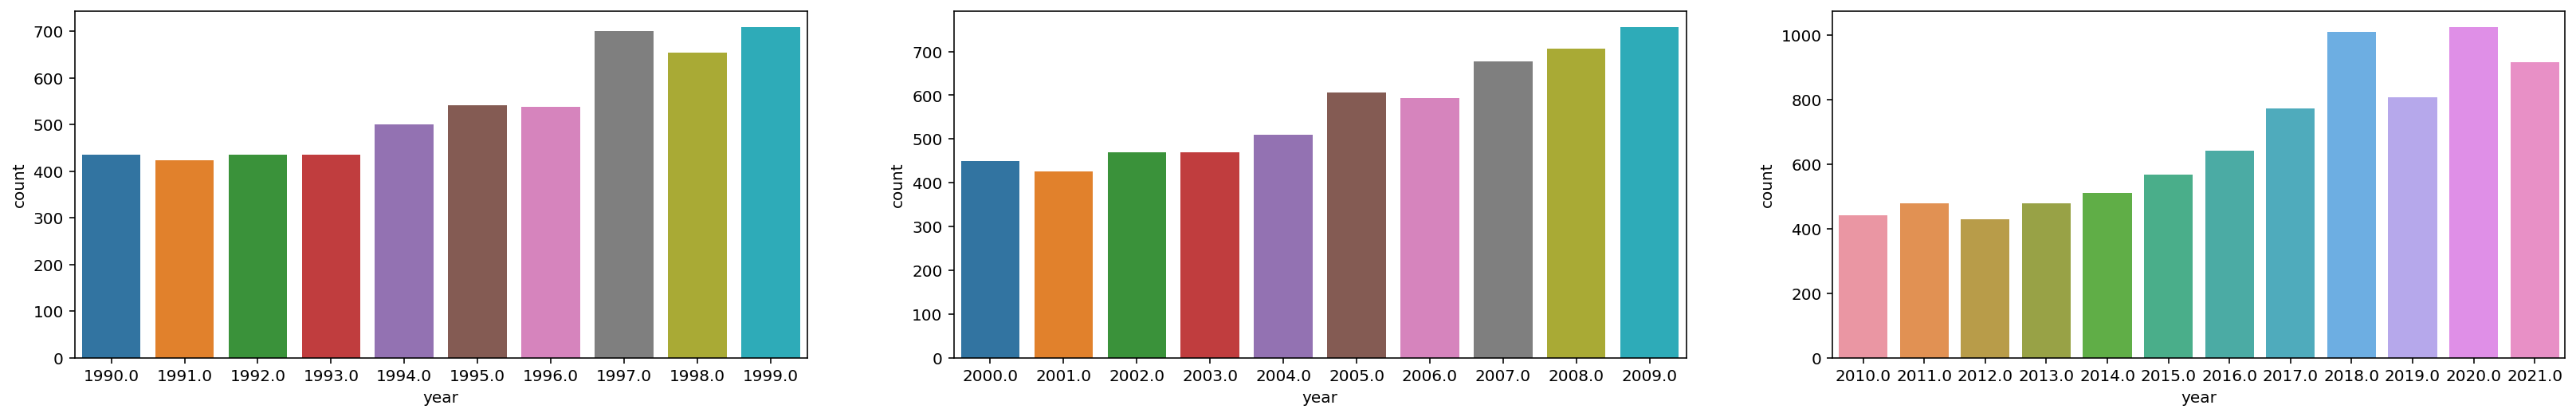

In [8]:
decade90 = pd.concat([decade90hit, decade90nonhit], join = 'inner').reset_index(drop = True)
decade00 = pd.concat([decade00hit, decade00nonhit], join = 'inner').reset_index(drop = True)
decade10 = pd.concat([decade10hit, decade10nonhit], join = 'inner').reset_index(drop = True)

decadeHits = pd.concat([decade90hit,decade00hit,decade10hit], join = 'inner').reset_index(drop = True)
decadeNonHits = pd.concat([decade90nonhit,decade00nonhit,decade10nonhit], join = 'inner').reset_index(drop = True)

final = pd.concat([decadeHits,decadeNonHits], join = 'inner').reset_index(drop = True)

decades = [decade90, decade00, decade10]

for decade in decades:
  decade.sort_values(by = ['year', 'weeks-on-board']).reset_index(drop = True) # Sorting by year then by weeks-on-board, resetting index as a final preparation of the dataset

print(f"Decade 90s: {len(decade90.index)}")
print(f"Decade 00s: {len(decade00.index)}")
print(f"Decade 10s: {len(decade10.index)}")


f, axes = plt.subplots(1, 3, figsize=(28, 4))
ax = sb.countplot(x = 'year', data = decade90, ax = axes[0])
ax = sb.countplot(x = 'year', data = decade00, ax = axes[1])
ax = sb.countplot(x = 'year', data = decade10, ax = axes[2])

# Exploratory Data Analysis



Description on non hit songs based on its featutures.

In [9]:
decadeNonHits.count()
decadeNonHits.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   track           9530 non-null   object 
 1   artist          9530 non-null   object 
 2   year            9530 non-null   float64
 3   acousticness    9530 non-null   float64
 4   danceability    9530 non-null   float64
 5   duration_ms     9530 non-null   float64
 6   energy          9530 non-null   float64
 7   key             9530 non-null   object 
 8   liveness        9530 non-null   float64
 9   loudness        9530 non-null   float64
 10  speechiness     9530 non-null   float64
 11  tempo           9530 non-null   float64
 12  valence         9530 non-null   float64
 13  charted         9530 non-null   bool   
 14  weeks-on-board  9530 non-null   int64  
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 1.0+ MB


Checking how many hit songs are categorised under each artist

In [10]:
decadeHits.artist.value_counts().head(20)

Taylor Swift     89
Drake            69
Glee Cast        52
Justin Bieber    44
Tim McGraw       43
Kenny Chesney    42
Eminem           41
The Weeknd       38
Ariana Grande    36
Keith Urban      35
Madonna          34
George Strait    34
Toby Keith       34
Rascal Flatts    33
Brad Paisley     32
Lady Gaga        31
Mariah Carey     30
Jason Aldean     29
Juice WRLD       29
Blake Shelton    29
Name: artist, dtype: int64

Normalising each features such that it is in the given range


In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

prep = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Normalising values with MinMaxScalar()

for decade in decades:
    decade[prep] = scaler.fit_transform(decade[prep])

Dropping selected features such as track, artist, and weeks-on-board as we are only making use of categorical data

In [12]:
trendDF = decadeHits.drop(labels = ['track', 'artist', 'weeks-on-board'], axis = 1, inplace = False)
trendDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  9569 non-null   float64
 1   energy        9569 non-null   float64
 2   key           9569 non-null   object 
 3   loudness      9569 non-null   float64
 4   speechiness   9569 non-null   float64
 5   acousticness  9569 non-null   float64
 6   liveness      9569 non-null   float64
 7   valence       9569 non-null   float64
 8   tempo         9569 non-null   float64
 9   duration_ms   9569 non-null   int64  
 10  year          9569 non-null   int64  
 11  charted       9569 non-null   bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 831.8+ KB


Correlation among features(Confusion Matrix)

<AxesSubplot:>

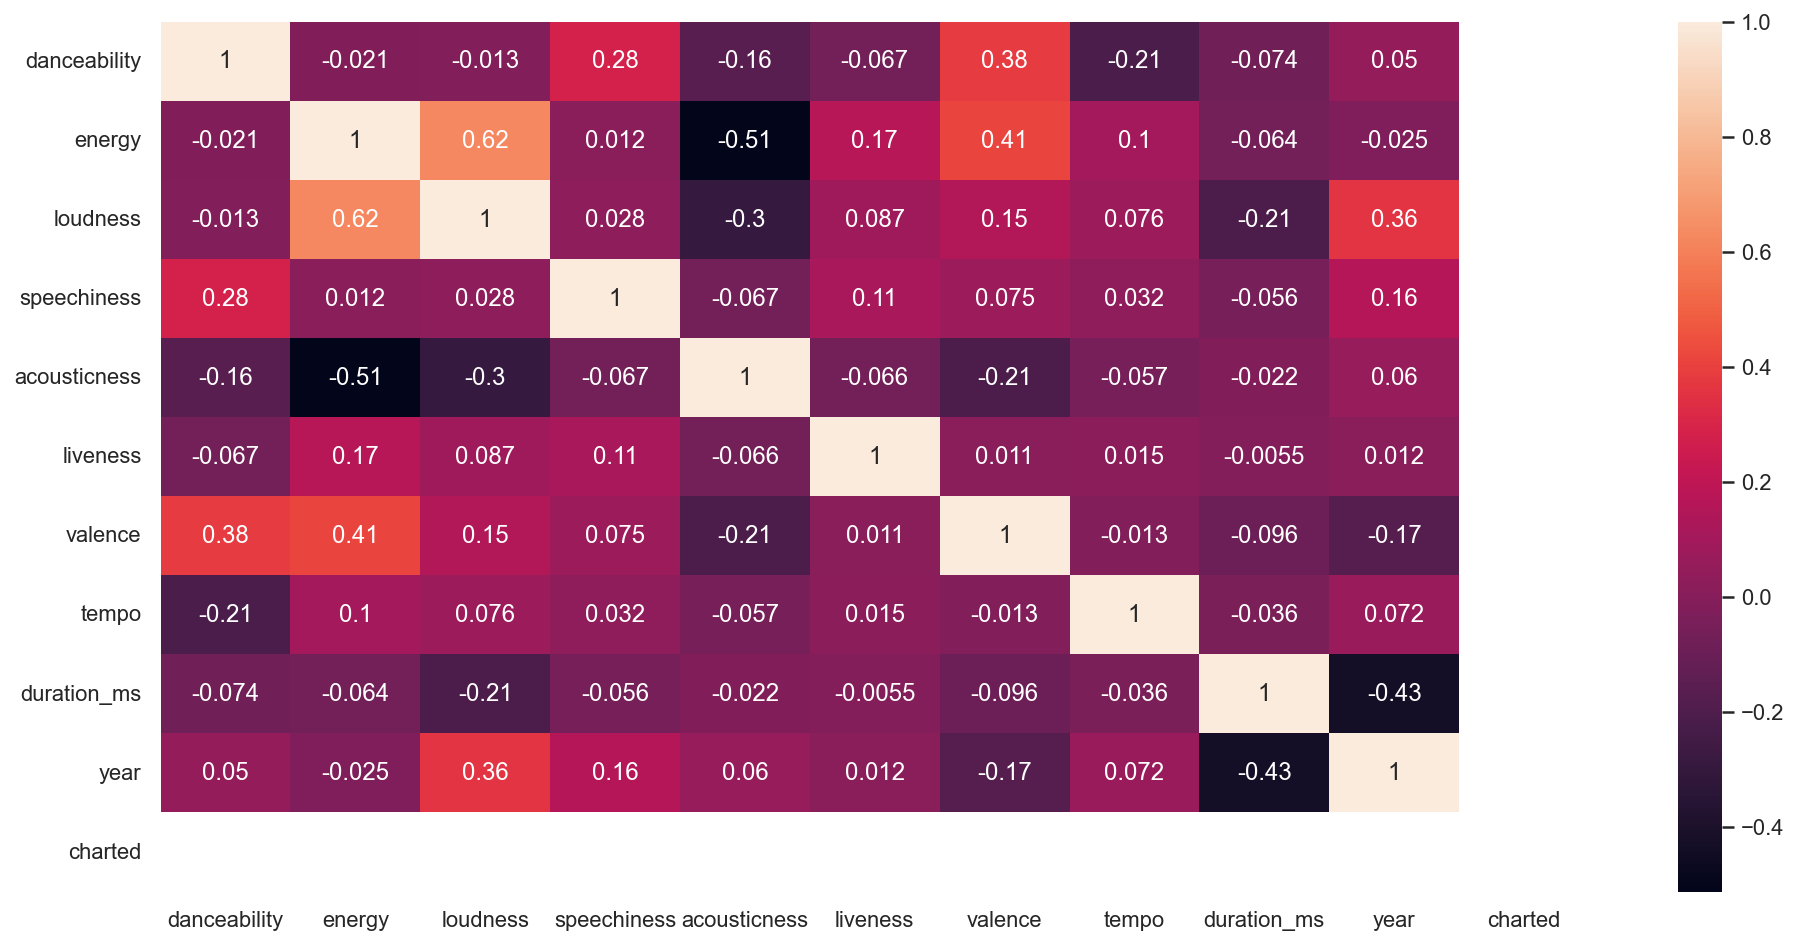

In [13]:
# Relation of variables
plt.figure(figsize=(16,8))
sb.set(style="whitegrid")

sb.heatmap(trendDF.corr(),annot=True)

<AxesSubplot:>

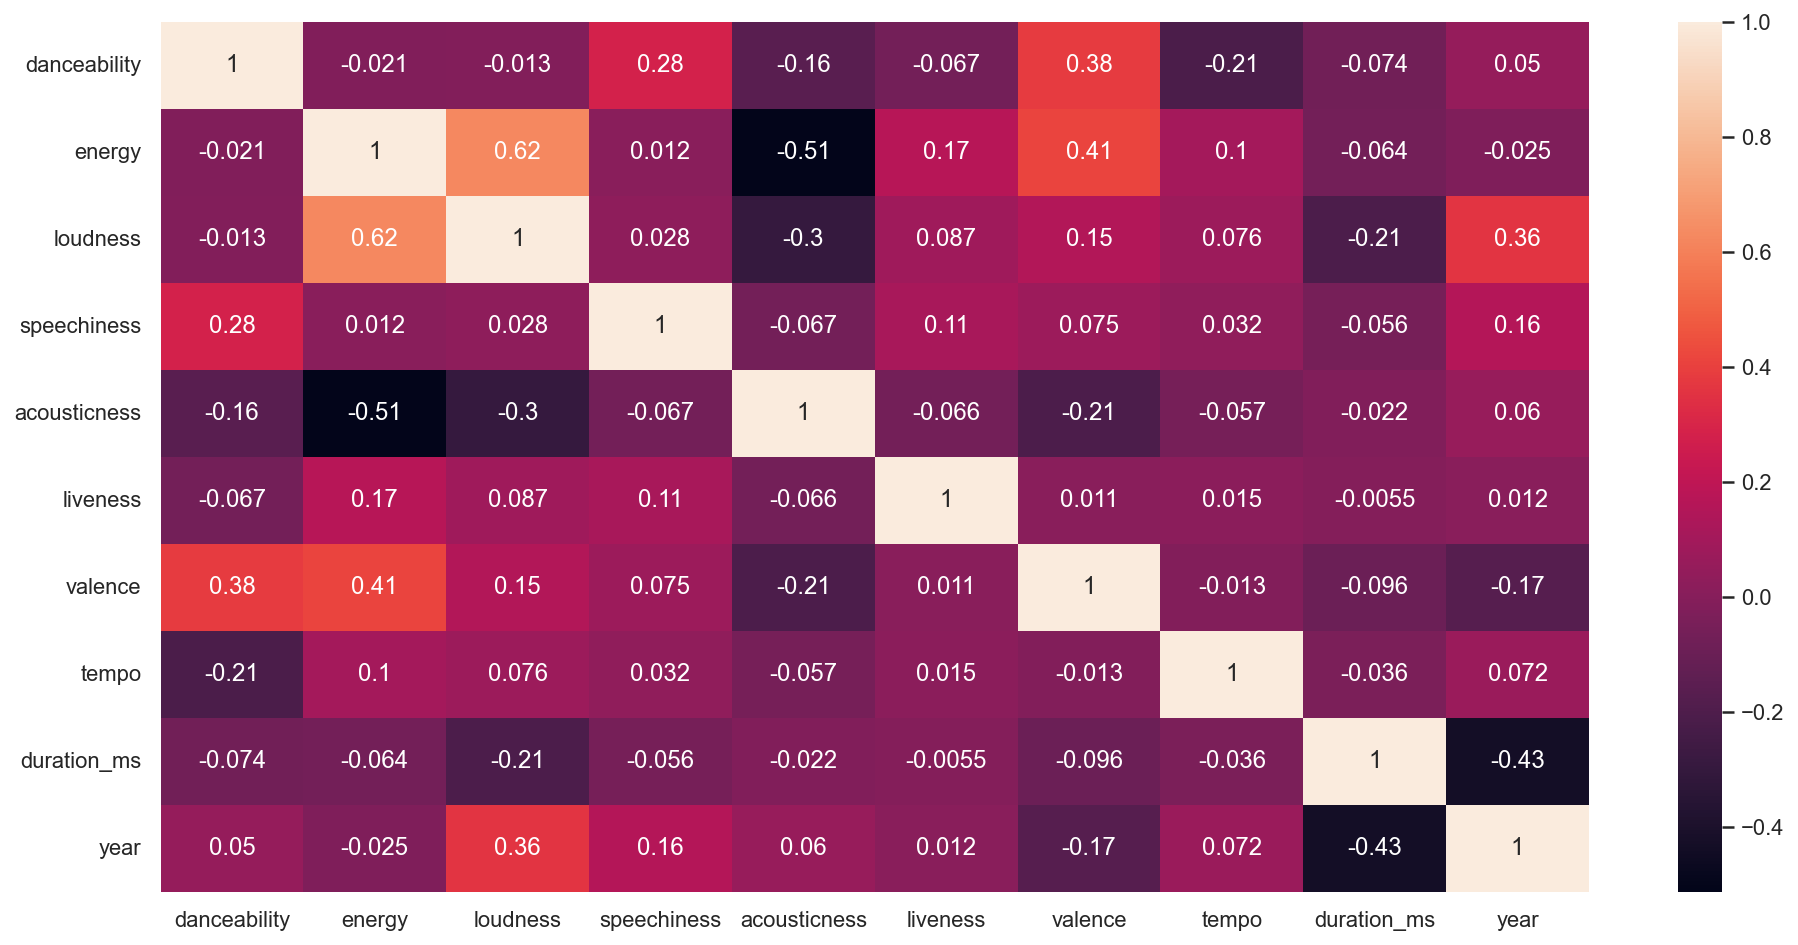

In [14]:
trendhits = decadeHits.drop(labels = ['track', 'artist', 'weeks-on-board', 'charted'], axis = 1, inplace = False)
# Relation of variables
plt.figure(figsize=(16,8))
sb.set(style="whitegrid")

sb.heatmap(trendhits.corr(),annot=True)

Check if variables affects rankings of songs 
i.e high danceability = higher ranking etc....

In [15]:
trendDF['duration_min'] = trendDF['duration_ms']/60000
grouped_music = trendDF['duration_min'].groupby(trendDF['year']).describe()
grouped_music.tail()

count      mean       std       min       25%       50%       75%  \
year                                                                      
2017  317.0  3.626292  0.669251  1.794550  3.240217  3.571083  3.935783   
2018  373.0  3.469952  0.752197  1.230217  3.044450  3.478883  3.842000   
2019  326.0  3.334562  0.613781  1.605550  2.972775  3.303225  3.691438   
2020  573.0  3.312476  0.729850  0.502217  2.863300  3.265100  3.667383   
2021  415.0  3.316812  0.827900  0.969150  2.800967  3.243683  3.648750   

           max  
year            
2017  7.676217  
2018  6.965333  
2019  6.021333  
2020  7.626533  
2021  9.802317

Visualising outliers using boxplot

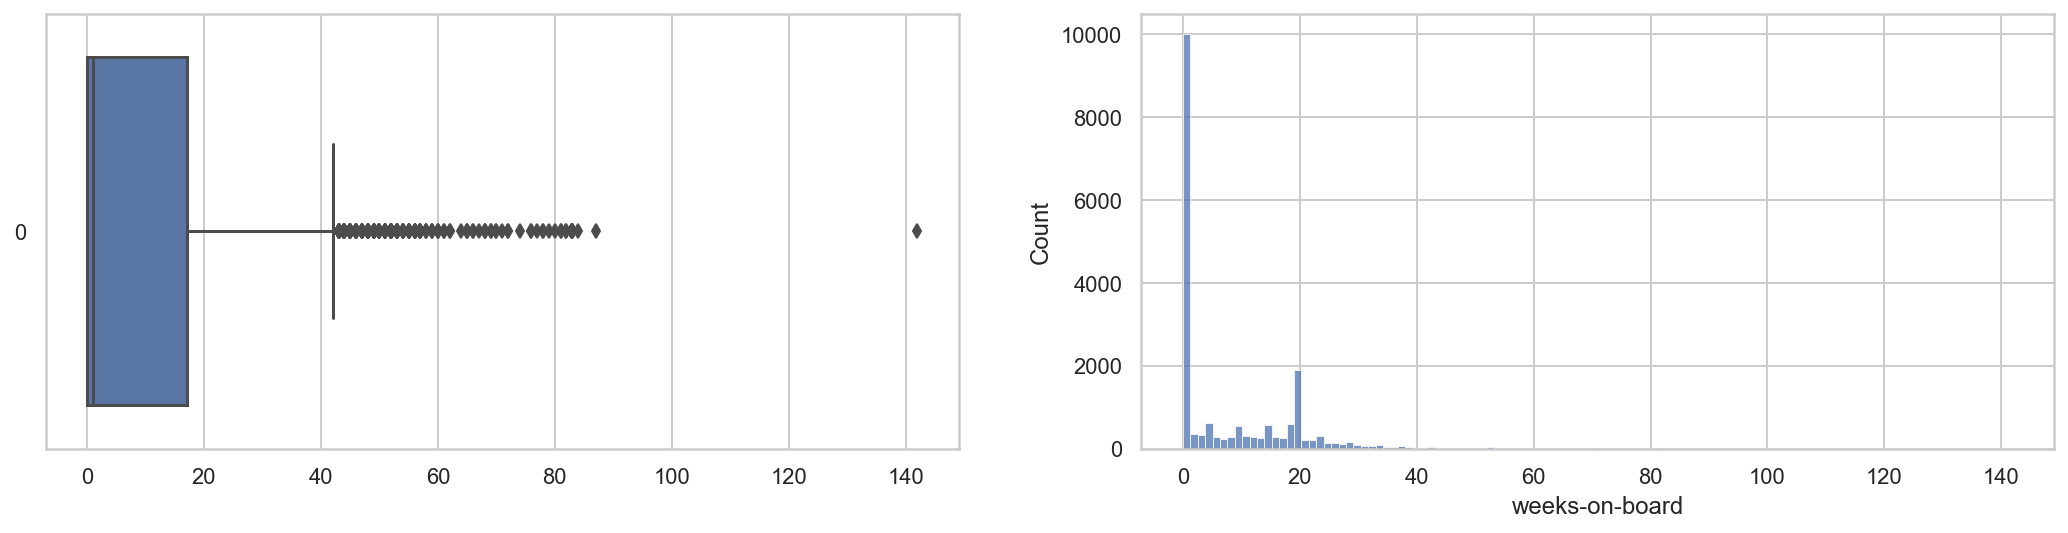

In [16]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = final['weeks-on-board'], orient = "h", ax = axes[0])
sb.histplot(data = final['weeks-on-board'], ax = axes[1])
plt.show()

Duration of songs throughout the years

In [17]:
year_avg_time = grouped_music['mean']
year_avg_min = grouped_music['mean'] - grouped_music['std']
year_avg_max = grouped_music['mean'] + grouped_music['std']

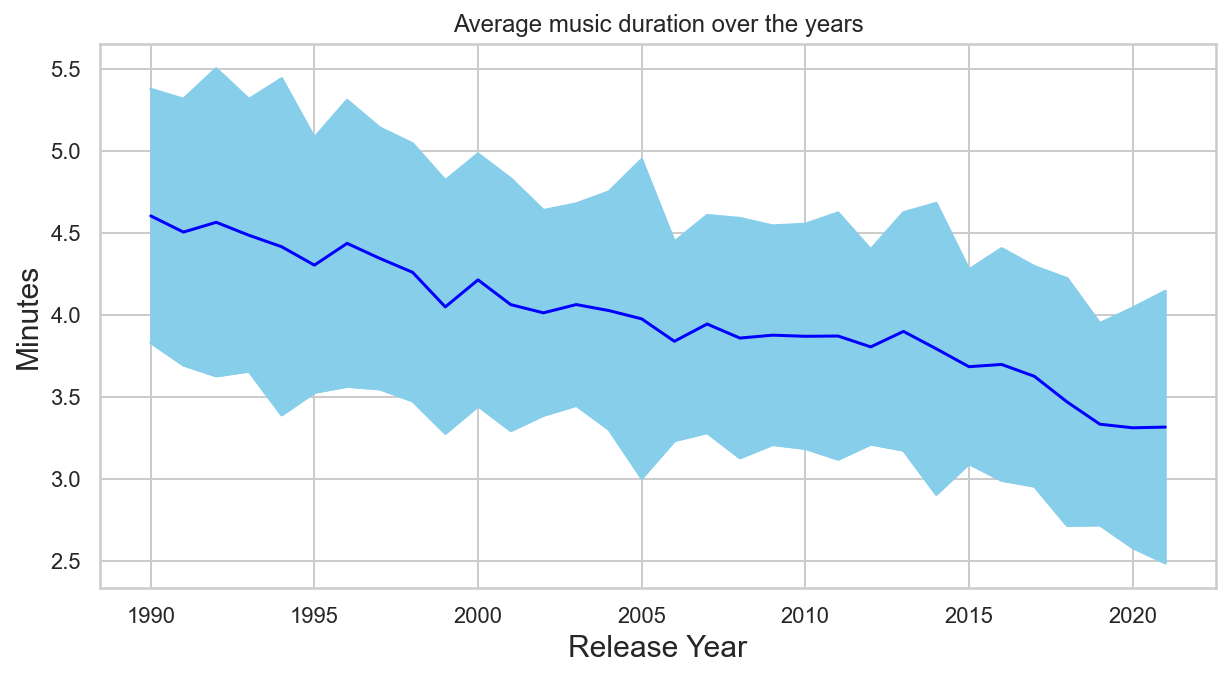

In [18]:
fig, x= plt.subplots(figsize=(10,5))
x.plot(year_avg_time,color = "blue")
x.plot(year_avg_min,color = "skyblue")
x.plot(year_avg_max,color = "skyblue")
x.fill_between(grouped_music.index,year_avg_min,year_avg_max,color = "skyblue")
x.set_title('Average music duration over the years')
x.set_xlabel('Release Year',fontsize = 15)
x.set_ylabel('Minutes',fontsize = 15)
plt.show()

Numbers of songs in different keys throughout the years

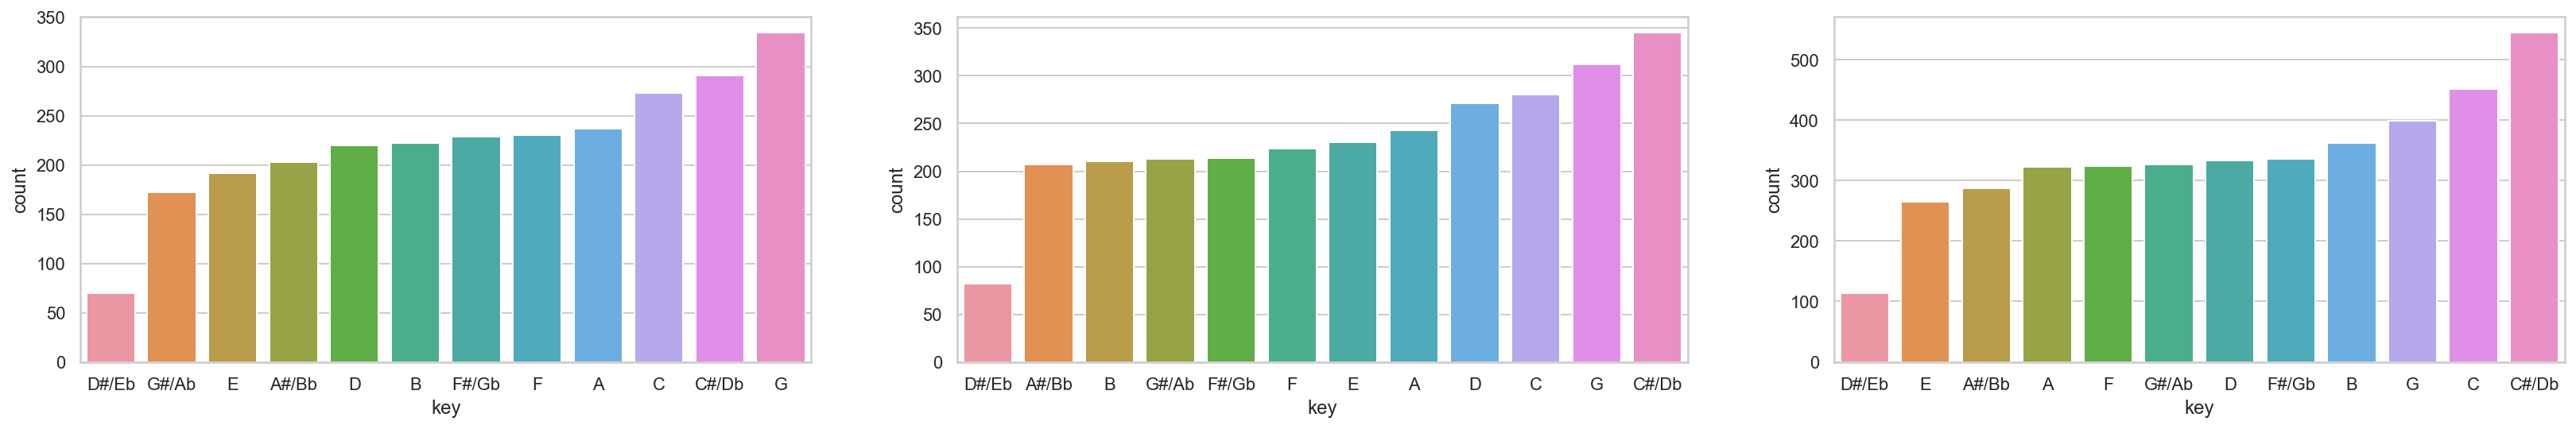

In [19]:
f, axes = plt.subplots(1, 3, figsize=(28, 4))
ax = sb.countplot(x = 'key', data = decade90hit, order = decade90hit['key'].value_counts(ascending = True).index, ax = axes[0])
ax = sb.countplot(x = 'key', data = decade00hit, order = decade00hit['key'].value_counts(ascending = True).index, ax = axes[1])
ax = sb.countplot(x = 'key', data = decade10hit, order = decade10hit['key'].value_counts(ascending = True).index, ax = axes[2])
plt.show()

Duration of songs over the years

Text(0.5, 0, 'Year')

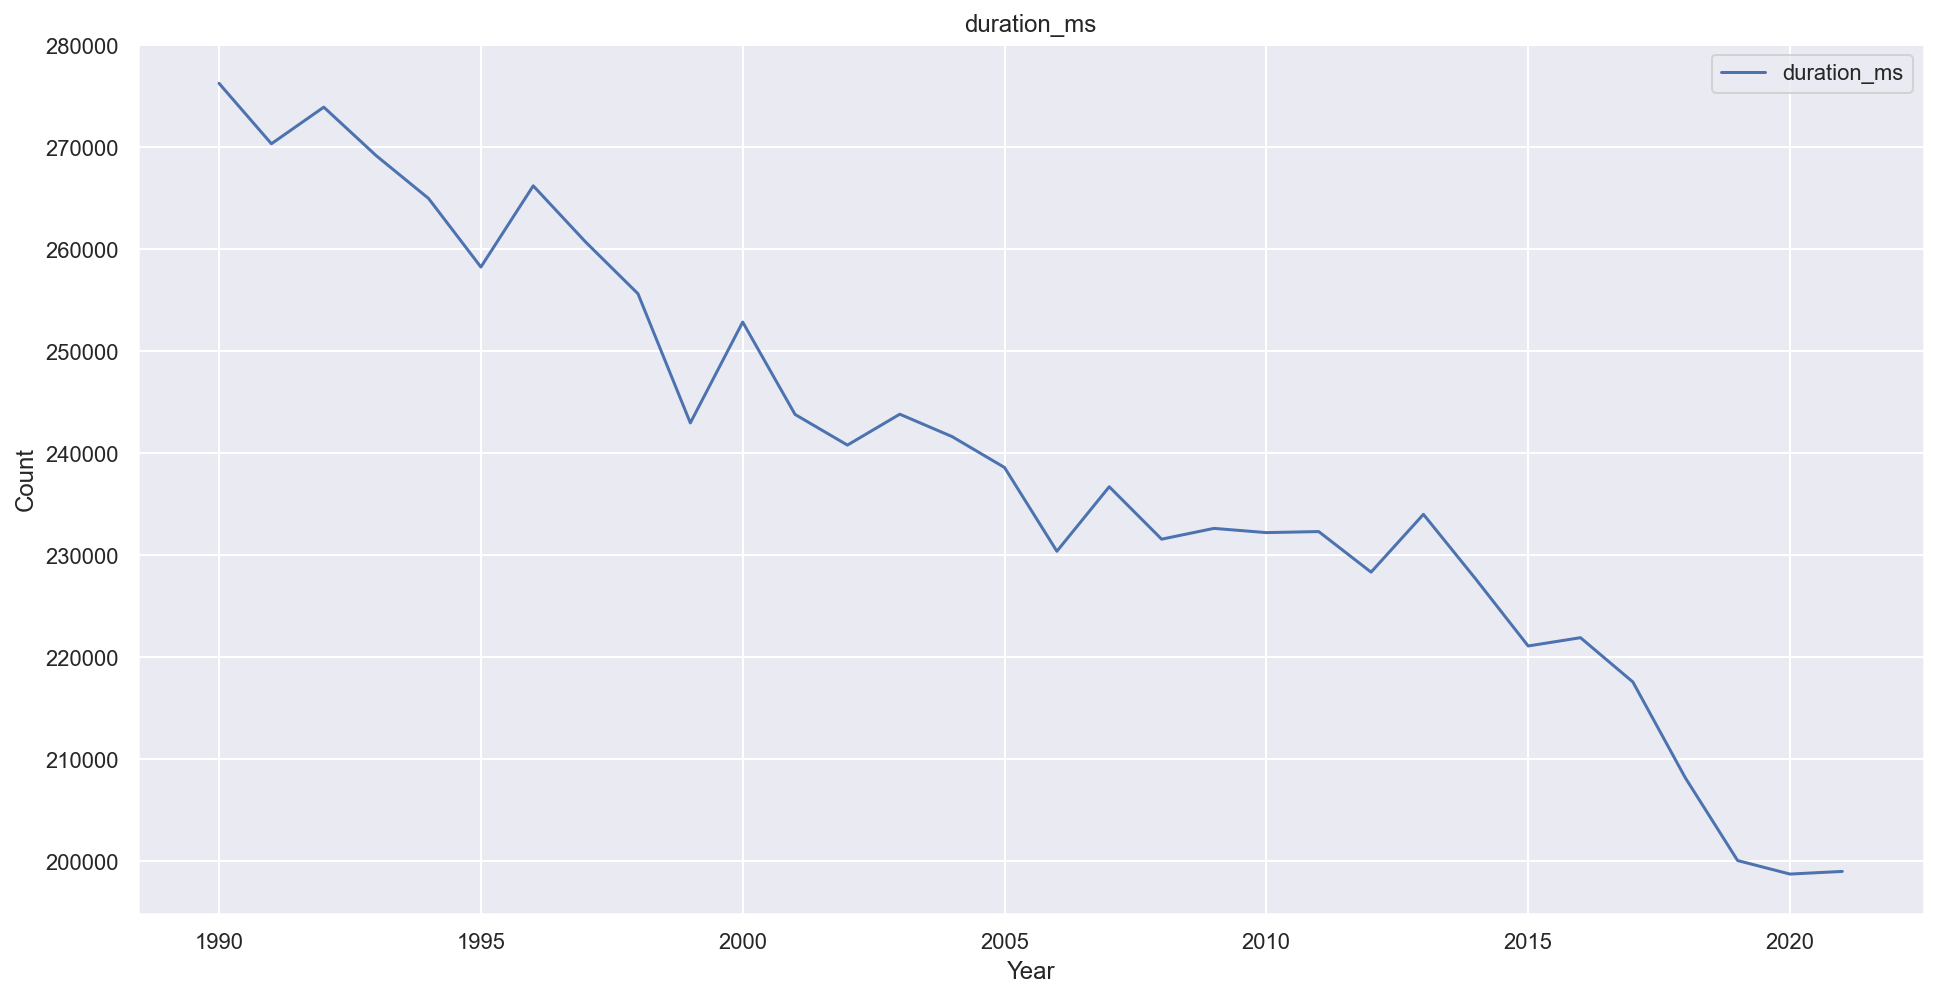

In [20]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['duration_ms'].mean()
ax=sb.lineplot(x=x.index,y=x,label='duration_ms')
ax.set_title('duration_ms')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Danceability of songs throughout the years 

Text(0.5, 0, 'Year')

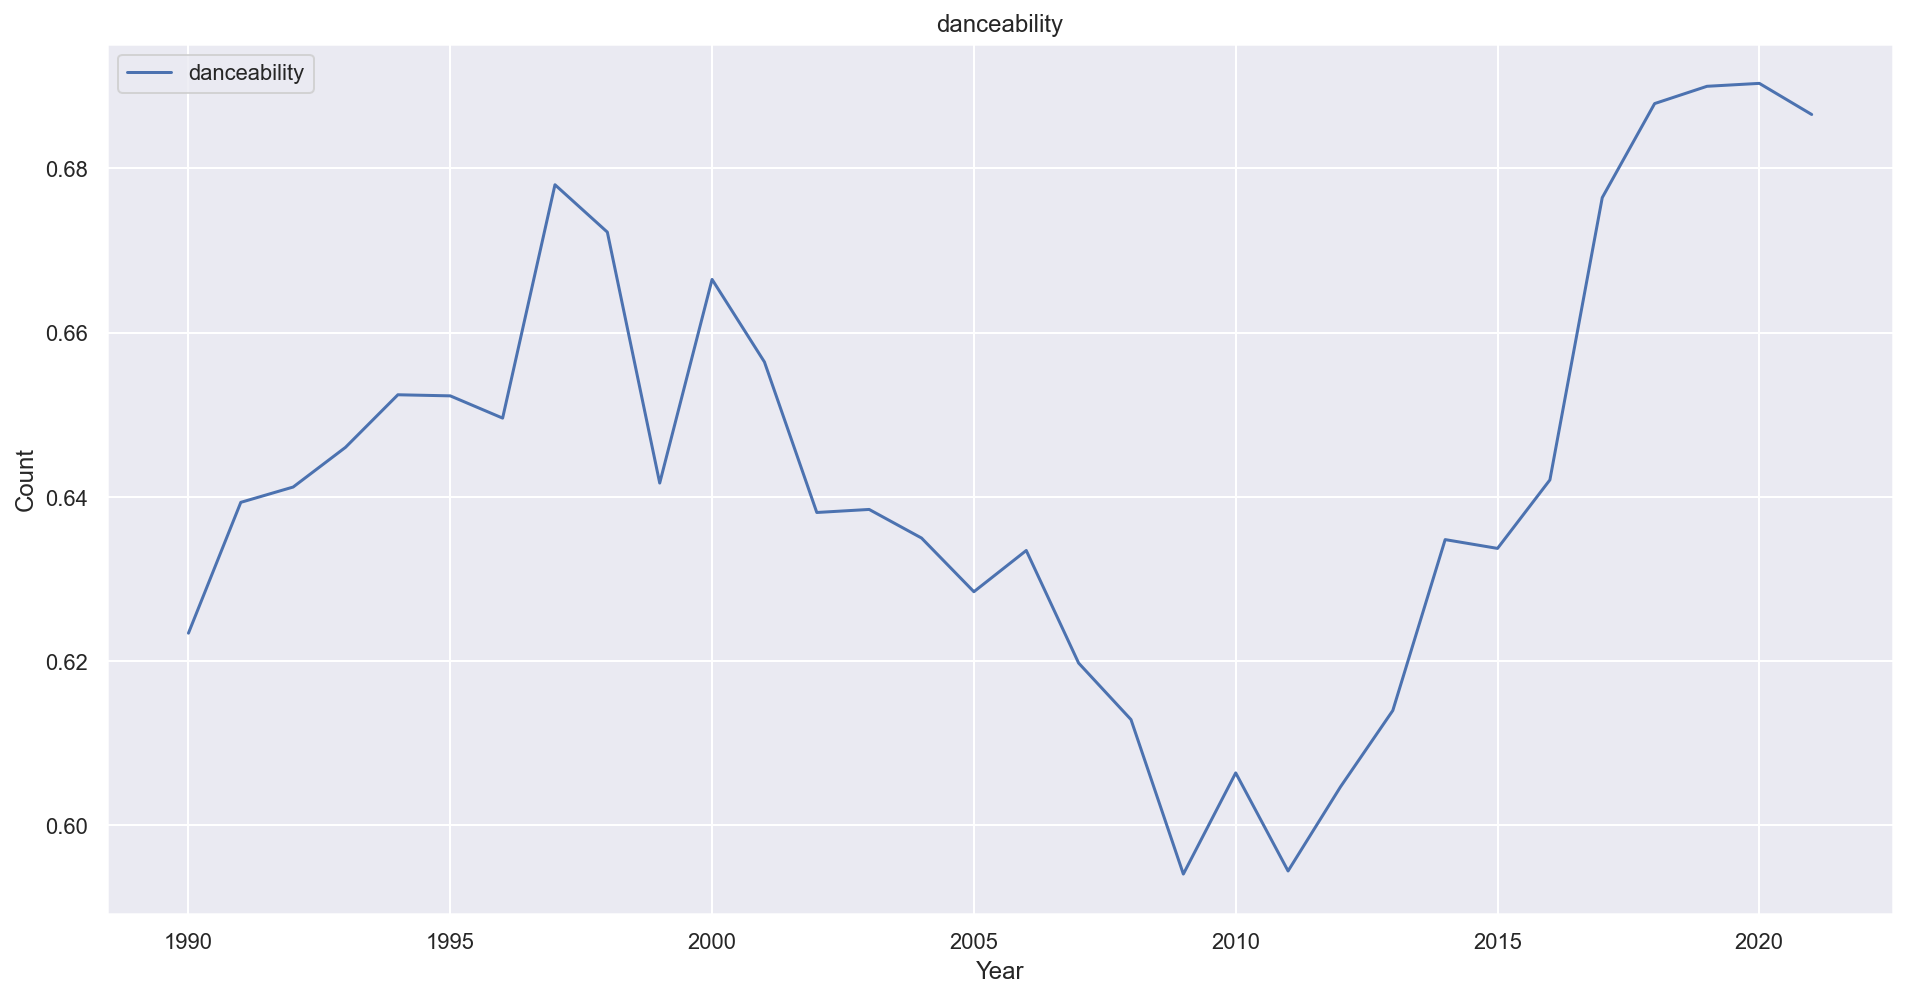

In [21]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['danceability'].mean()
ax=sb.lineplot(x=x.index,y=x,label='danceability')
ax.set_title('danceability')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Tempo of songs through the years

Text(0.5, 0, 'Year')

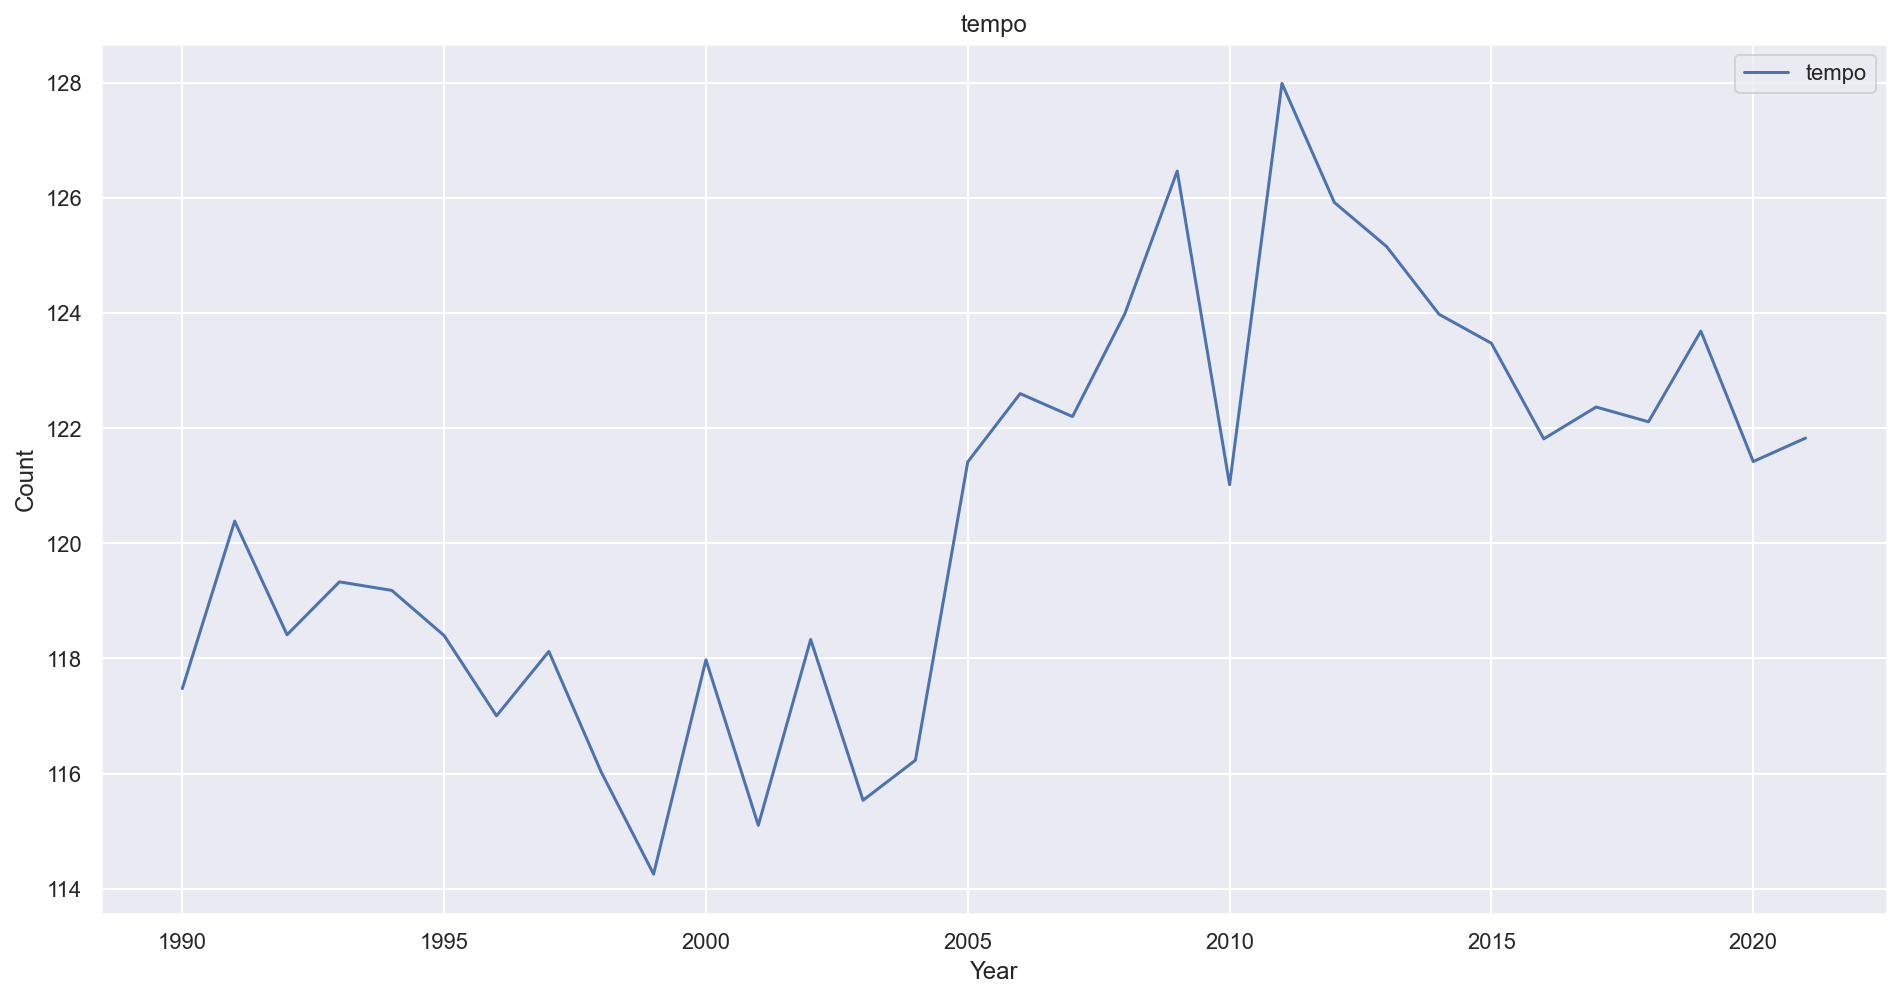

In [22]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['tempo'].mean()
ax=sb.lineplot(x=x.index,y=x,label='tempo')
ax.set_title('tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Loudness of songs over the years

Text(0.5, 0, 'Year')

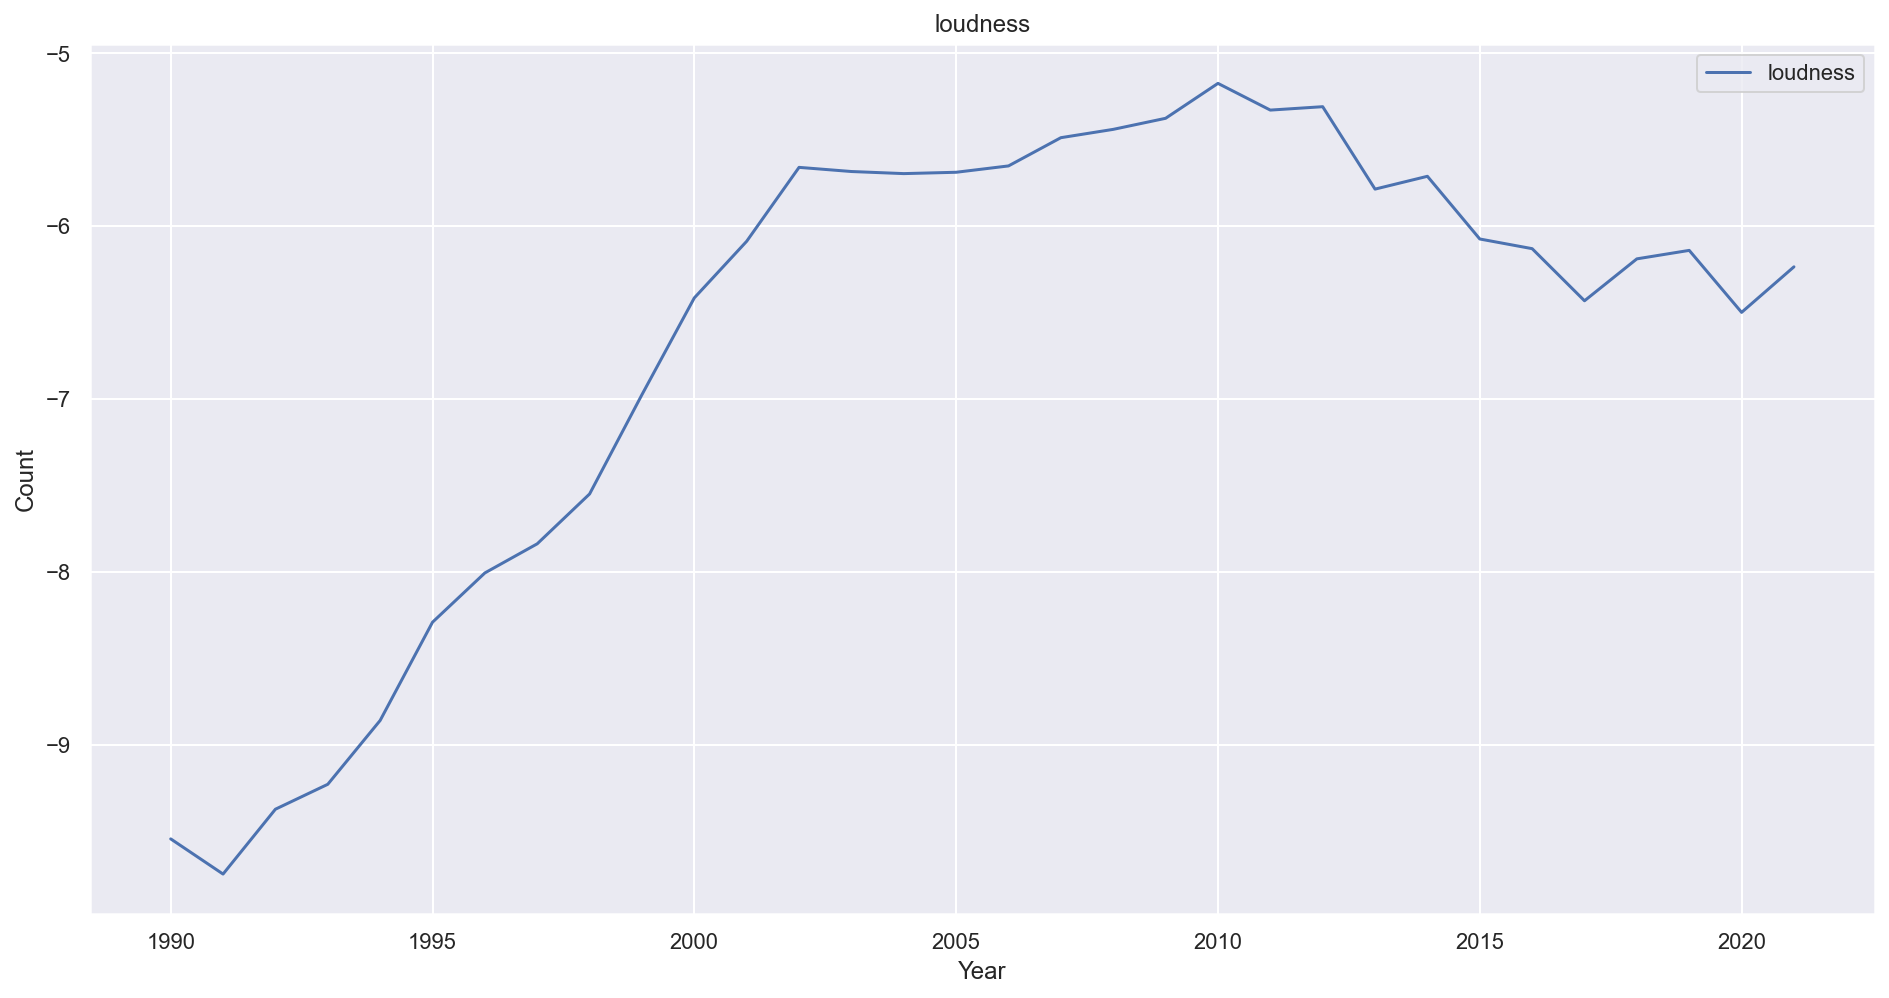

In [23]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['loudness'].mean()
ax=sb.lineplot(x=x.index,y=x,label='loudness')
ax.set_title('loudness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Acousticness of songs over the years

Text(0.5, 0, 'Year')

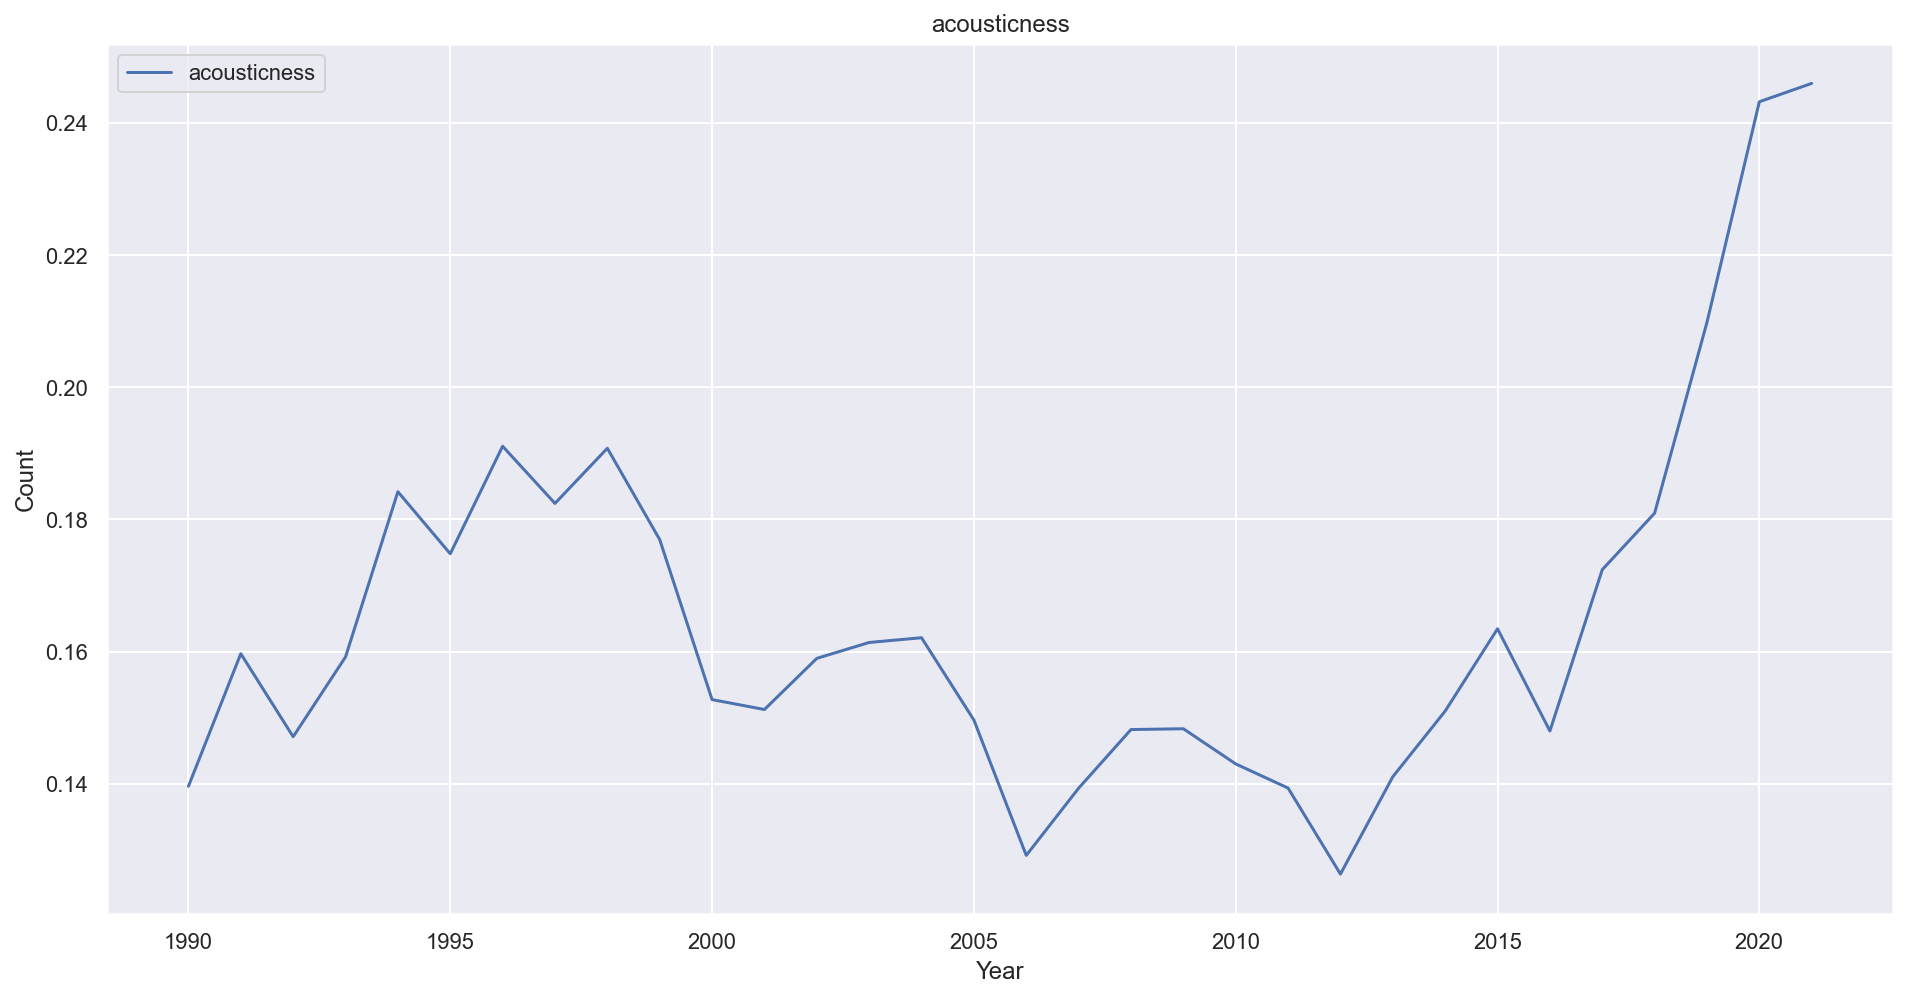

In [24]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['acousticness'].mean()
ax=sb.lineplot(x=x.index,y=x,label='acousticness')
ax.set_title('acousticness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Speechiness of songs over the years

Text(0.5, 0, 'Year')

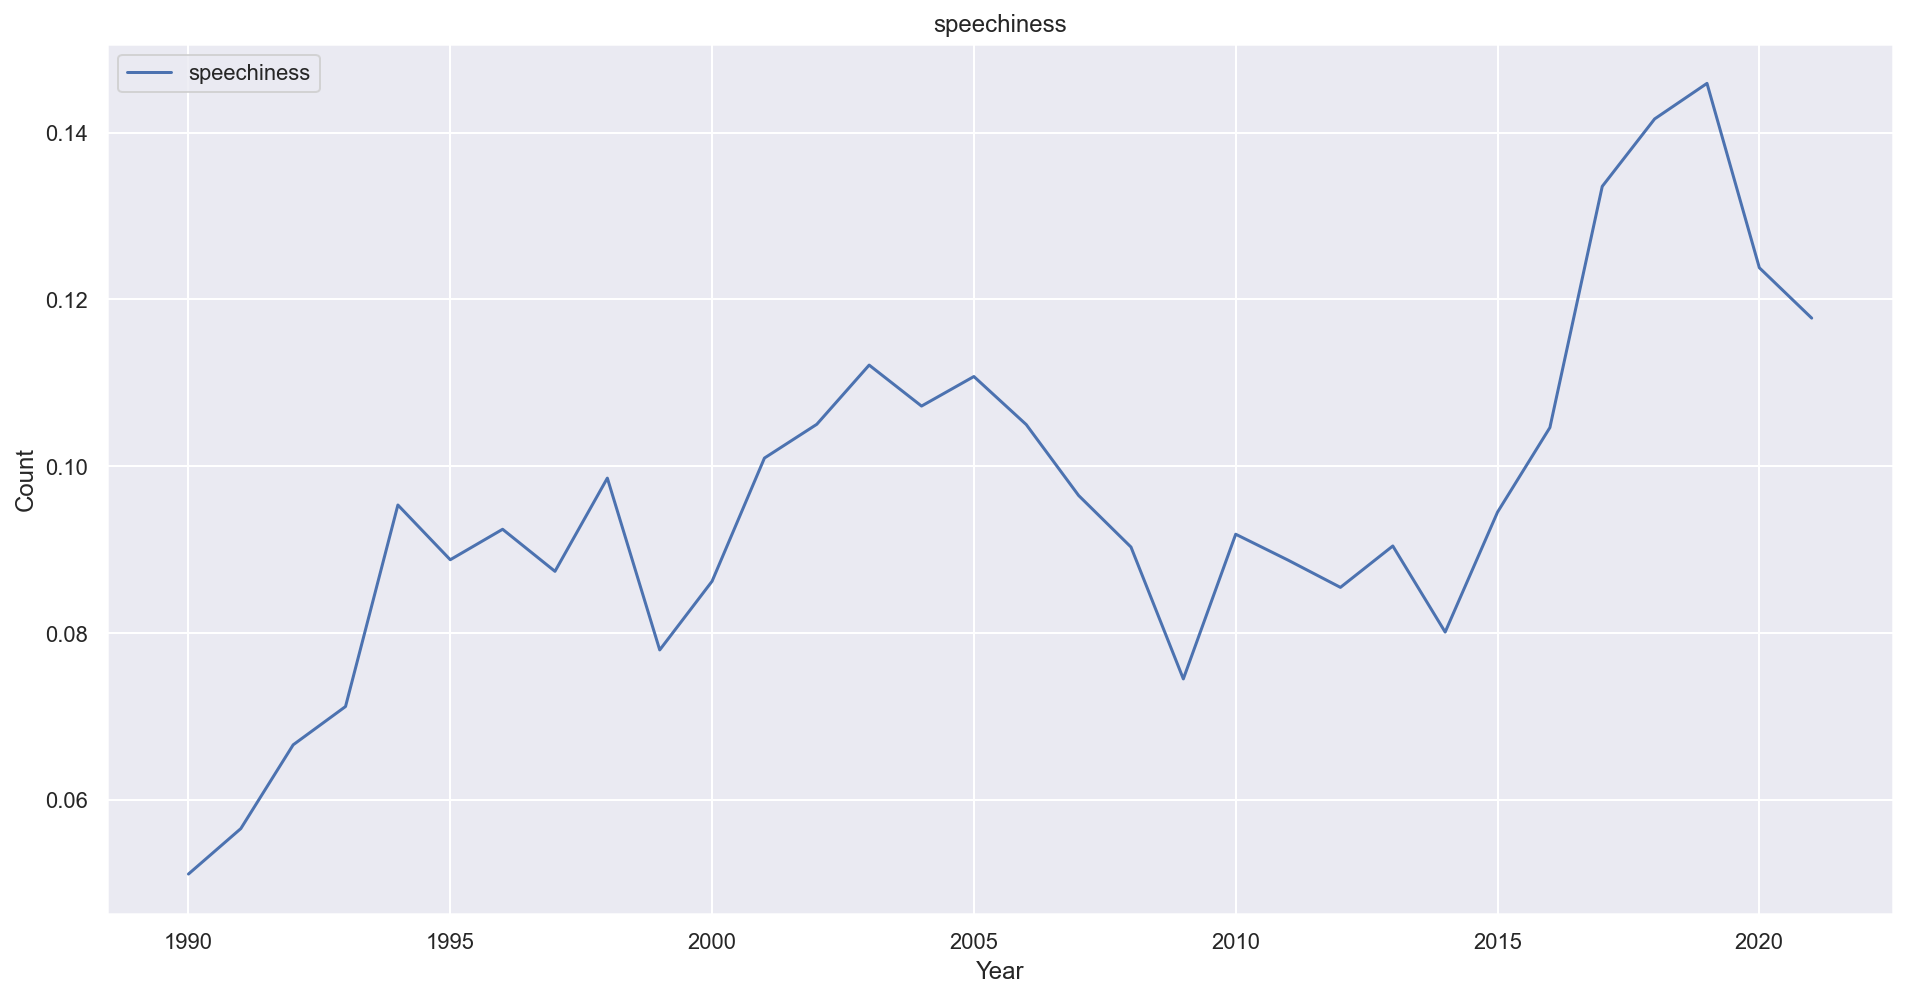

In [25]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['speechiness'].mean()
ax=sb.lineplot(x=x.index,y=x,label='speechiness')
ax.set_title('speechiness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Liveness of songs over the years

Text(0.5, 0, 'Year')

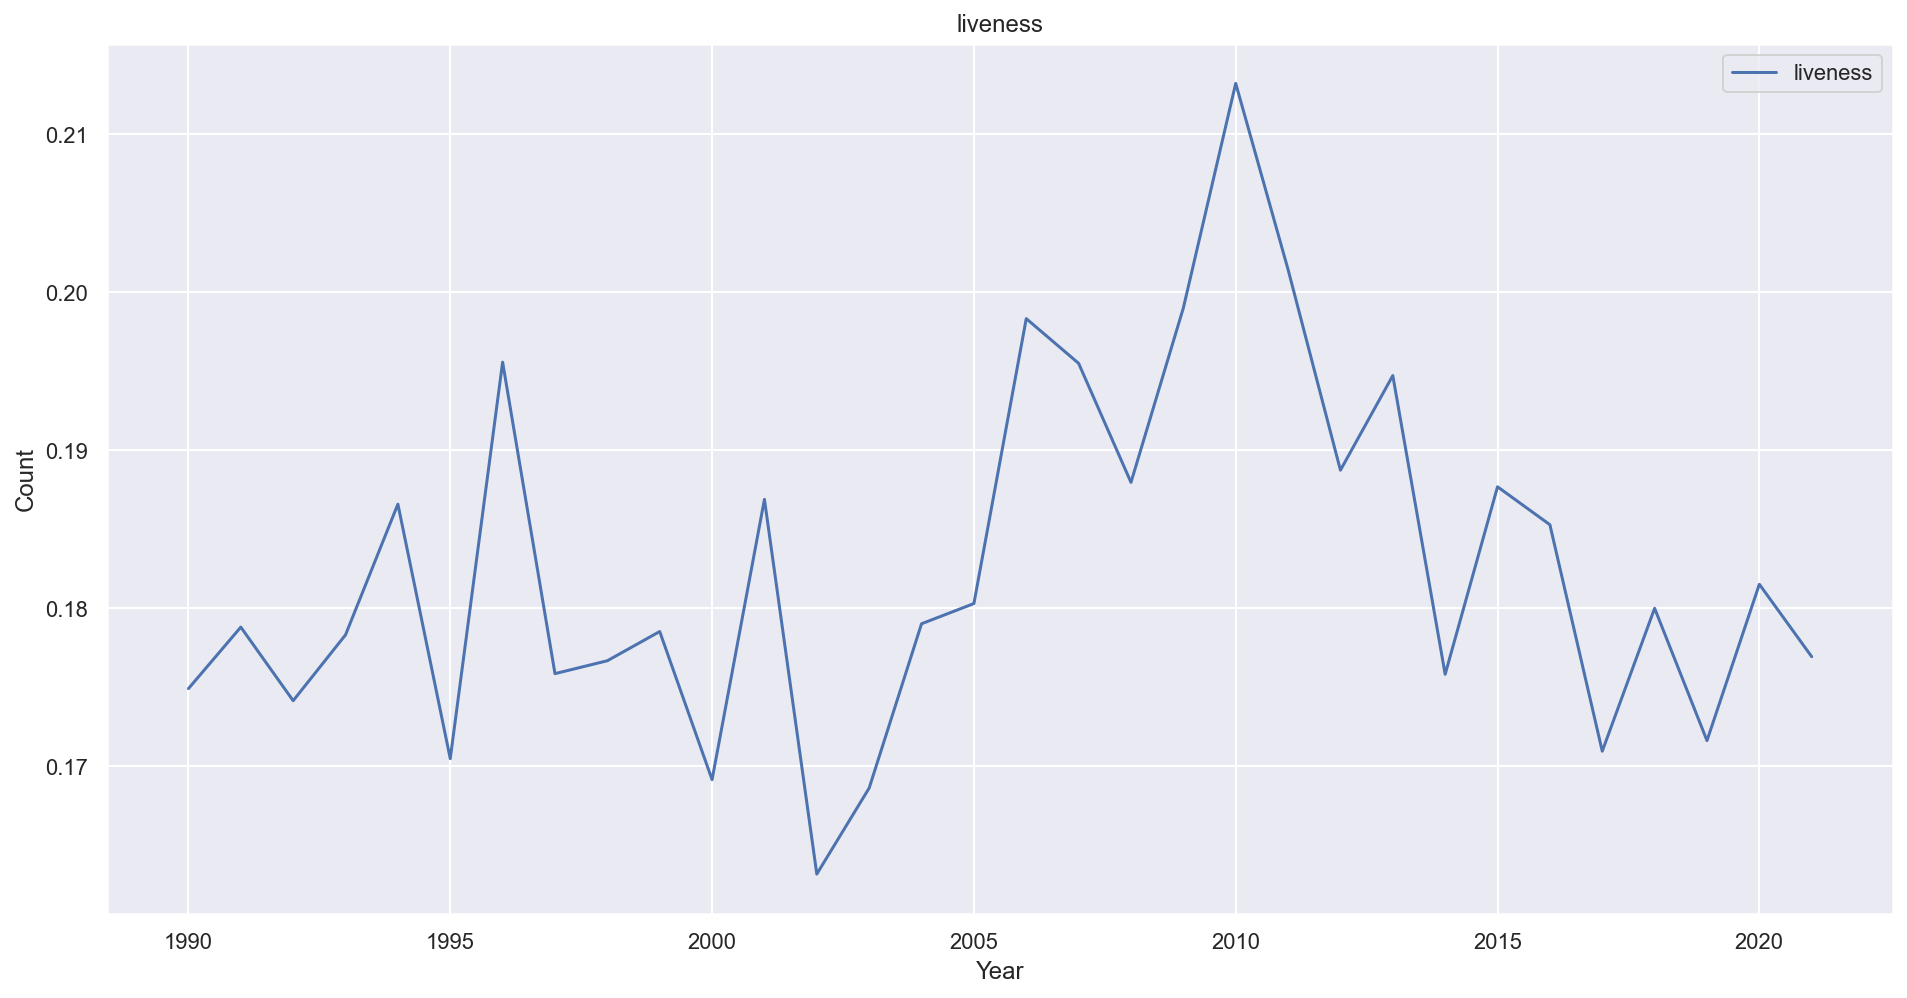

In [26]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['liveness'].mean()
ax=sb.lineplot(x=x.index,y=x,label='liveness')
ax.set_title('liveness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Valence of songs over the years

Text(0.5, 0, 'Year')

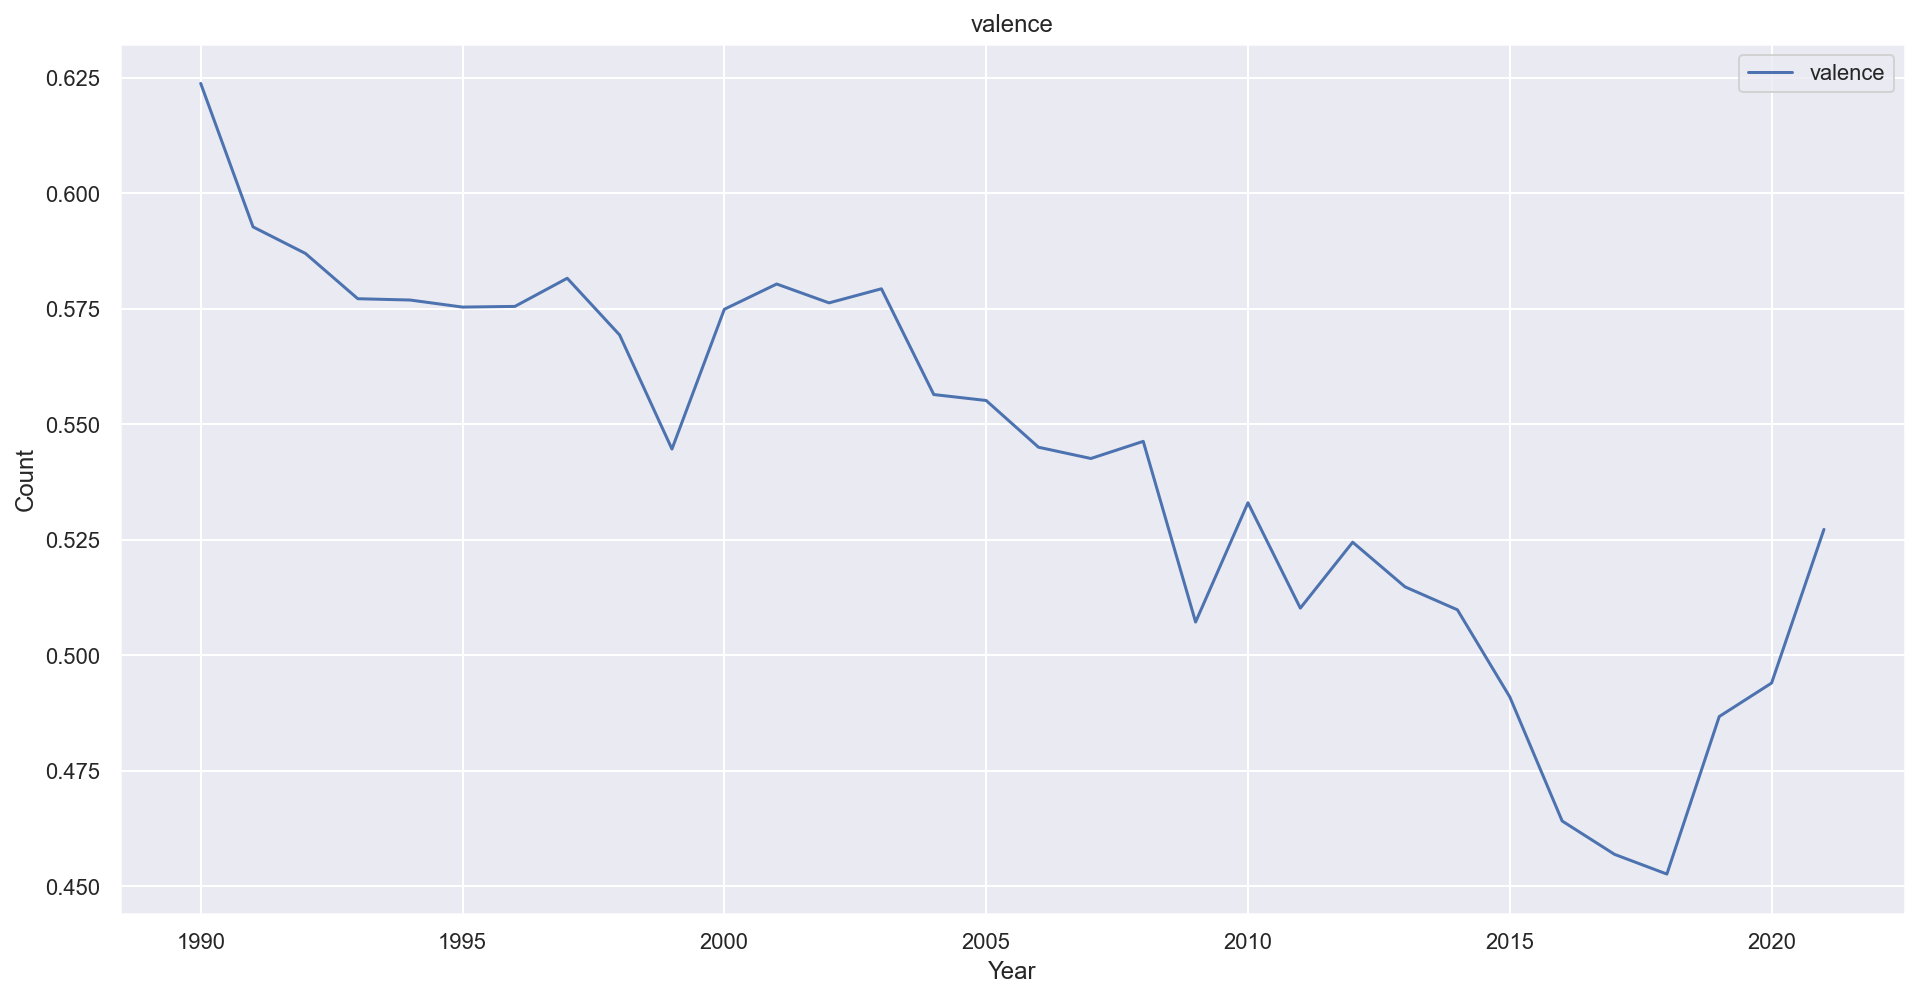

In [27]:
plt.figure(figsize = (16,8))
sb.set(style="darkgrid")
x=decadeHits.groupby('year')['valence'].mean()
ax=sb.lineplot(x=x.index,y=x,label='valence')
ax.set_title('valence')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# Model Training

Spltting of data for every decade

In [28]:
from sklearn.model_selection import train_test_split

#dropping certain features for each decade
decade90_final = decade90.drop(labels = ['track', 'artist', 'year'], axis = 1, inplace = False)
decade00_final = decade00.drop(labels = ['track', 'artist', 'year'], axis = 1, inplace = False)
decade10_final = decade10.drop(labels = ['track', 'artist', 'year'], axis = 1, inplace = False)

train90, test90 = train_test_split(decade90_final, test_size = 0.2, random_state = 52)
train00, test00 = train_test_split(decade00_final, test_size = 0.2, random_state = 52)
train10, test10 = train_test_split(decade10_final, test_size = 0.2, random_state = 52)

train90.head()

danceability    energy    key  loudness  speechiness  acousticness  \
3861      0.505618  0.420565      E  0.622297     0.053686      0.010944   
1109      0.680286  0.638729  G#/Ab  0.835912     0.051921      0.060843   
2344      0.622063  0.911934      A  0.932774     0.035099      0.073695   
4279      0.678243  0.992995      A  0.828559     0.067394      0.037149   
1638      0.741573  0.453590  A#/Bb  0.825296     0.026272      0.433735   

      liveness   valence     tempo  duration_ms  weeks-on-board  charted  
3861  0.587174  0.451613  0.555438     0.112860               0    False  
1109  0.064629  0.430444  0.451109     0.202096              12     True  
2344  0.159319  0.568548  0.542248     0.174237              20     True  
4279  0.126253  0.101815  0.734947     0.346567               0    False  
1638  0.044689  0.549395  0.367117     0.185023               5     True

Visualising the correleation of features for each decade

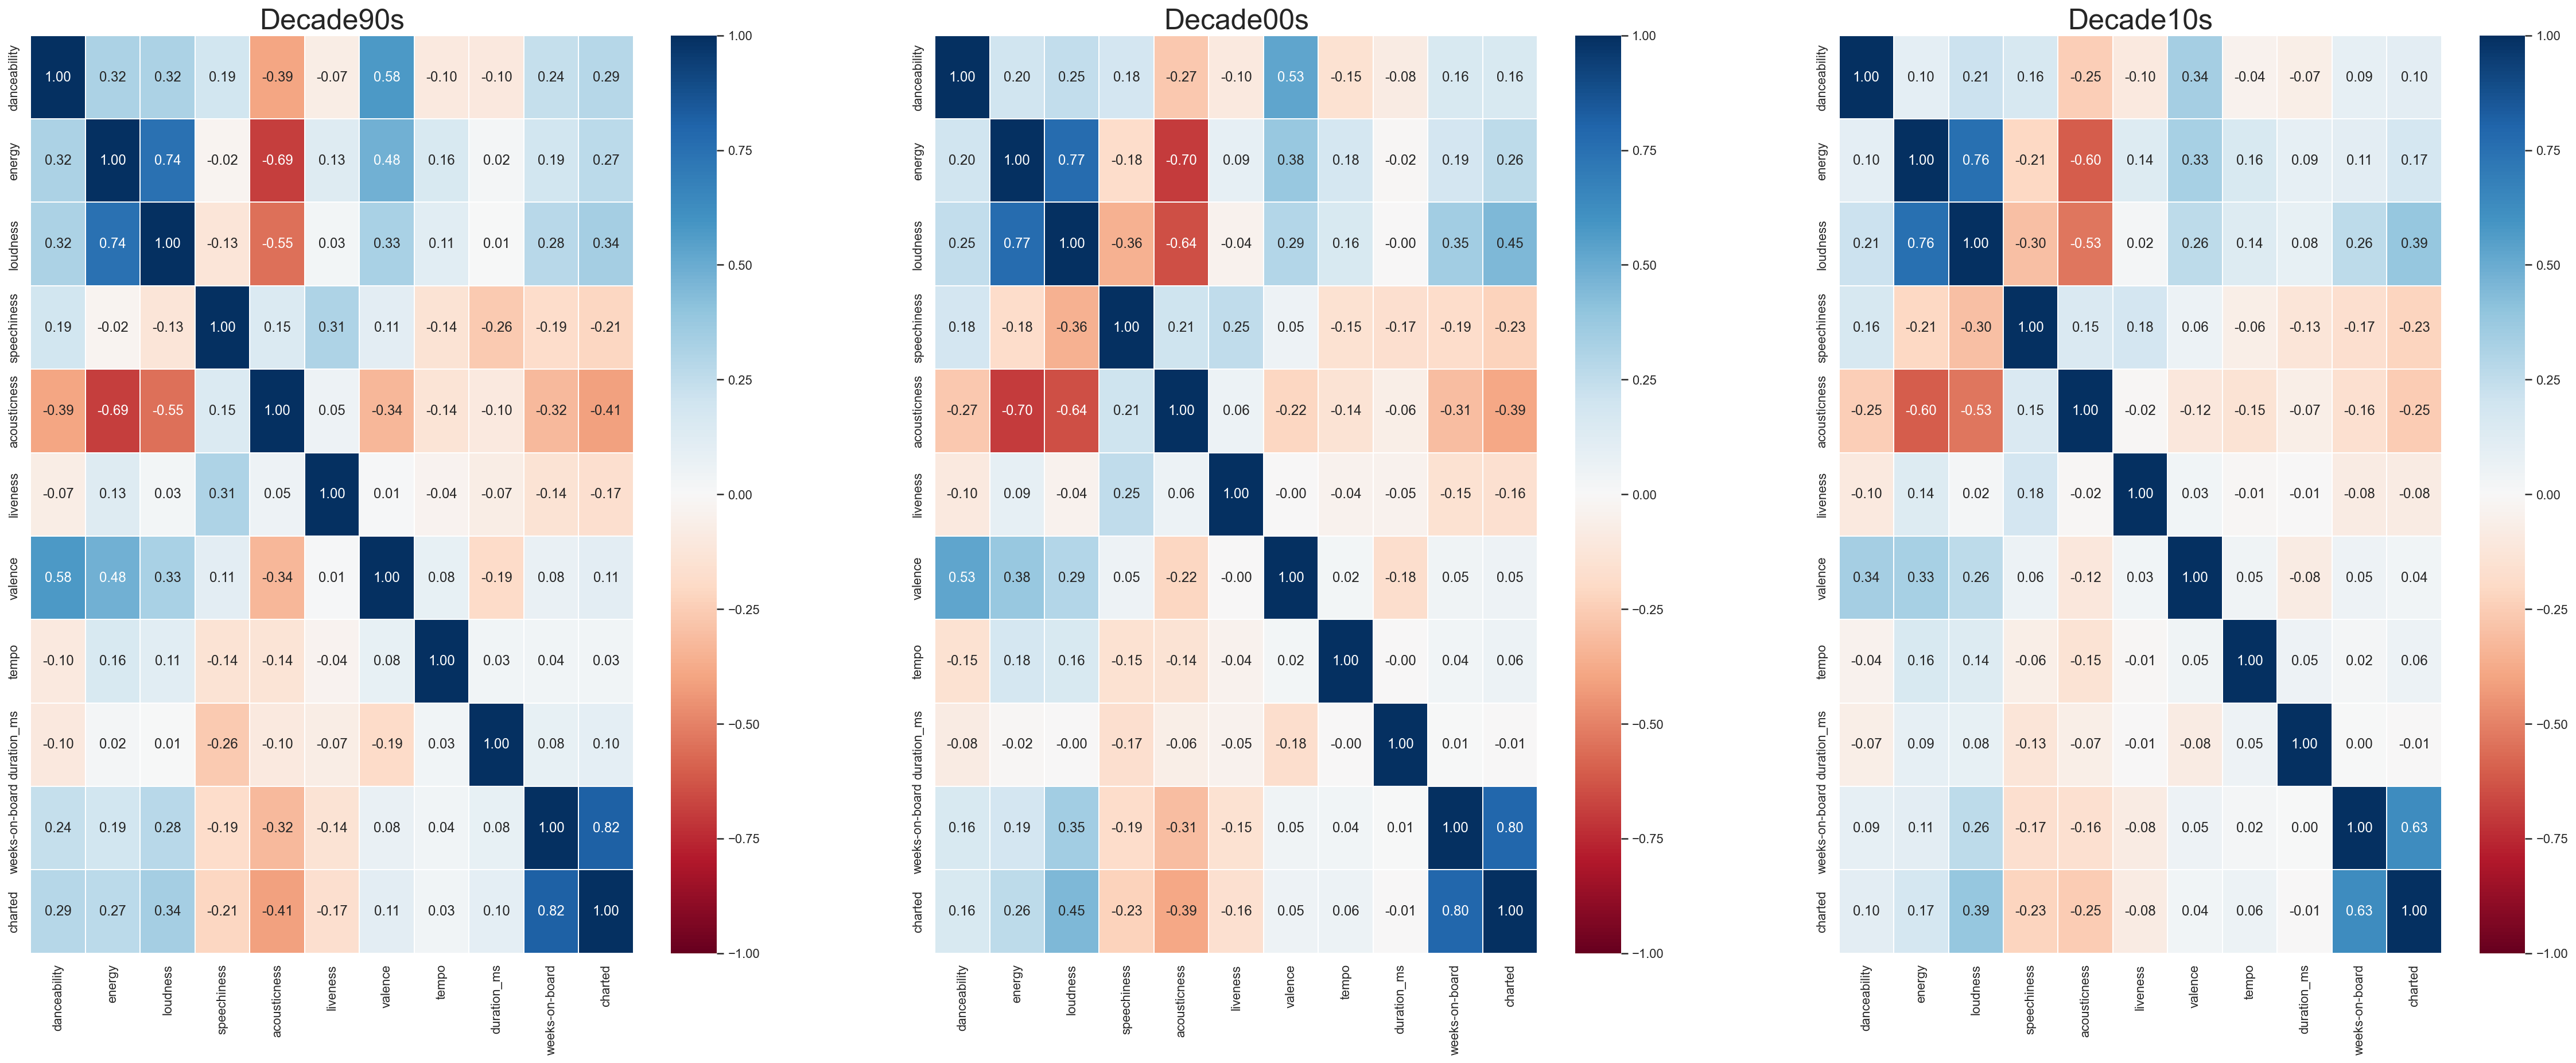

In [29]:
# Creating 3 Subplots
f = plt.figure(figsize=(40, 50))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

#Creating Heatmaps for every decade
sb.heatmap(decade90_final.corr(), ax = ax1 ,vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")
ax1.set_title("Decade90s", fontsize= 25)
sb.heatmap(decade00_final.corr(), ax = ax2, vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")
ax2.set_title("Decade00s", fontsize= 25)
sb.heatmap(decade10_final.corr(), ax = ax3, vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")
ax3.set_title("Decade10s", fontsize= 25)

plt.show()

Visualising outliers in boxplot for each decade

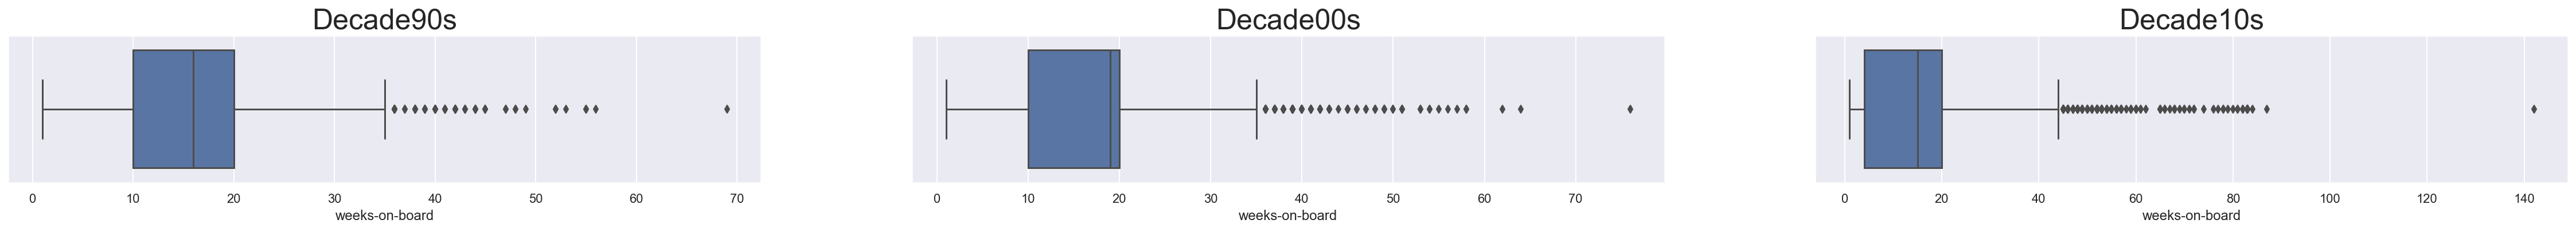

In [30]:
# Creating 3 Subplots
f = plt.figure(figsize=(40, 8))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

#Creating Heatmaps for every decade
sb.boxplot(x = decade90hit['weeks-on-board'], ax = ax1)
ax1.set_title("Decade90s", fontsize= 25)
sb.boxplot(x = decade00hit['weeks-on-board'], ax = ax2)
ax2.set_title("Decade00s", fontsize= 25)
sb.boxplot(x = decade10hit['weeks-on-board'], ax = ax3)
ax3.set_title("Decade10s", fontsize= 25)

plt.show()

Correleation among features

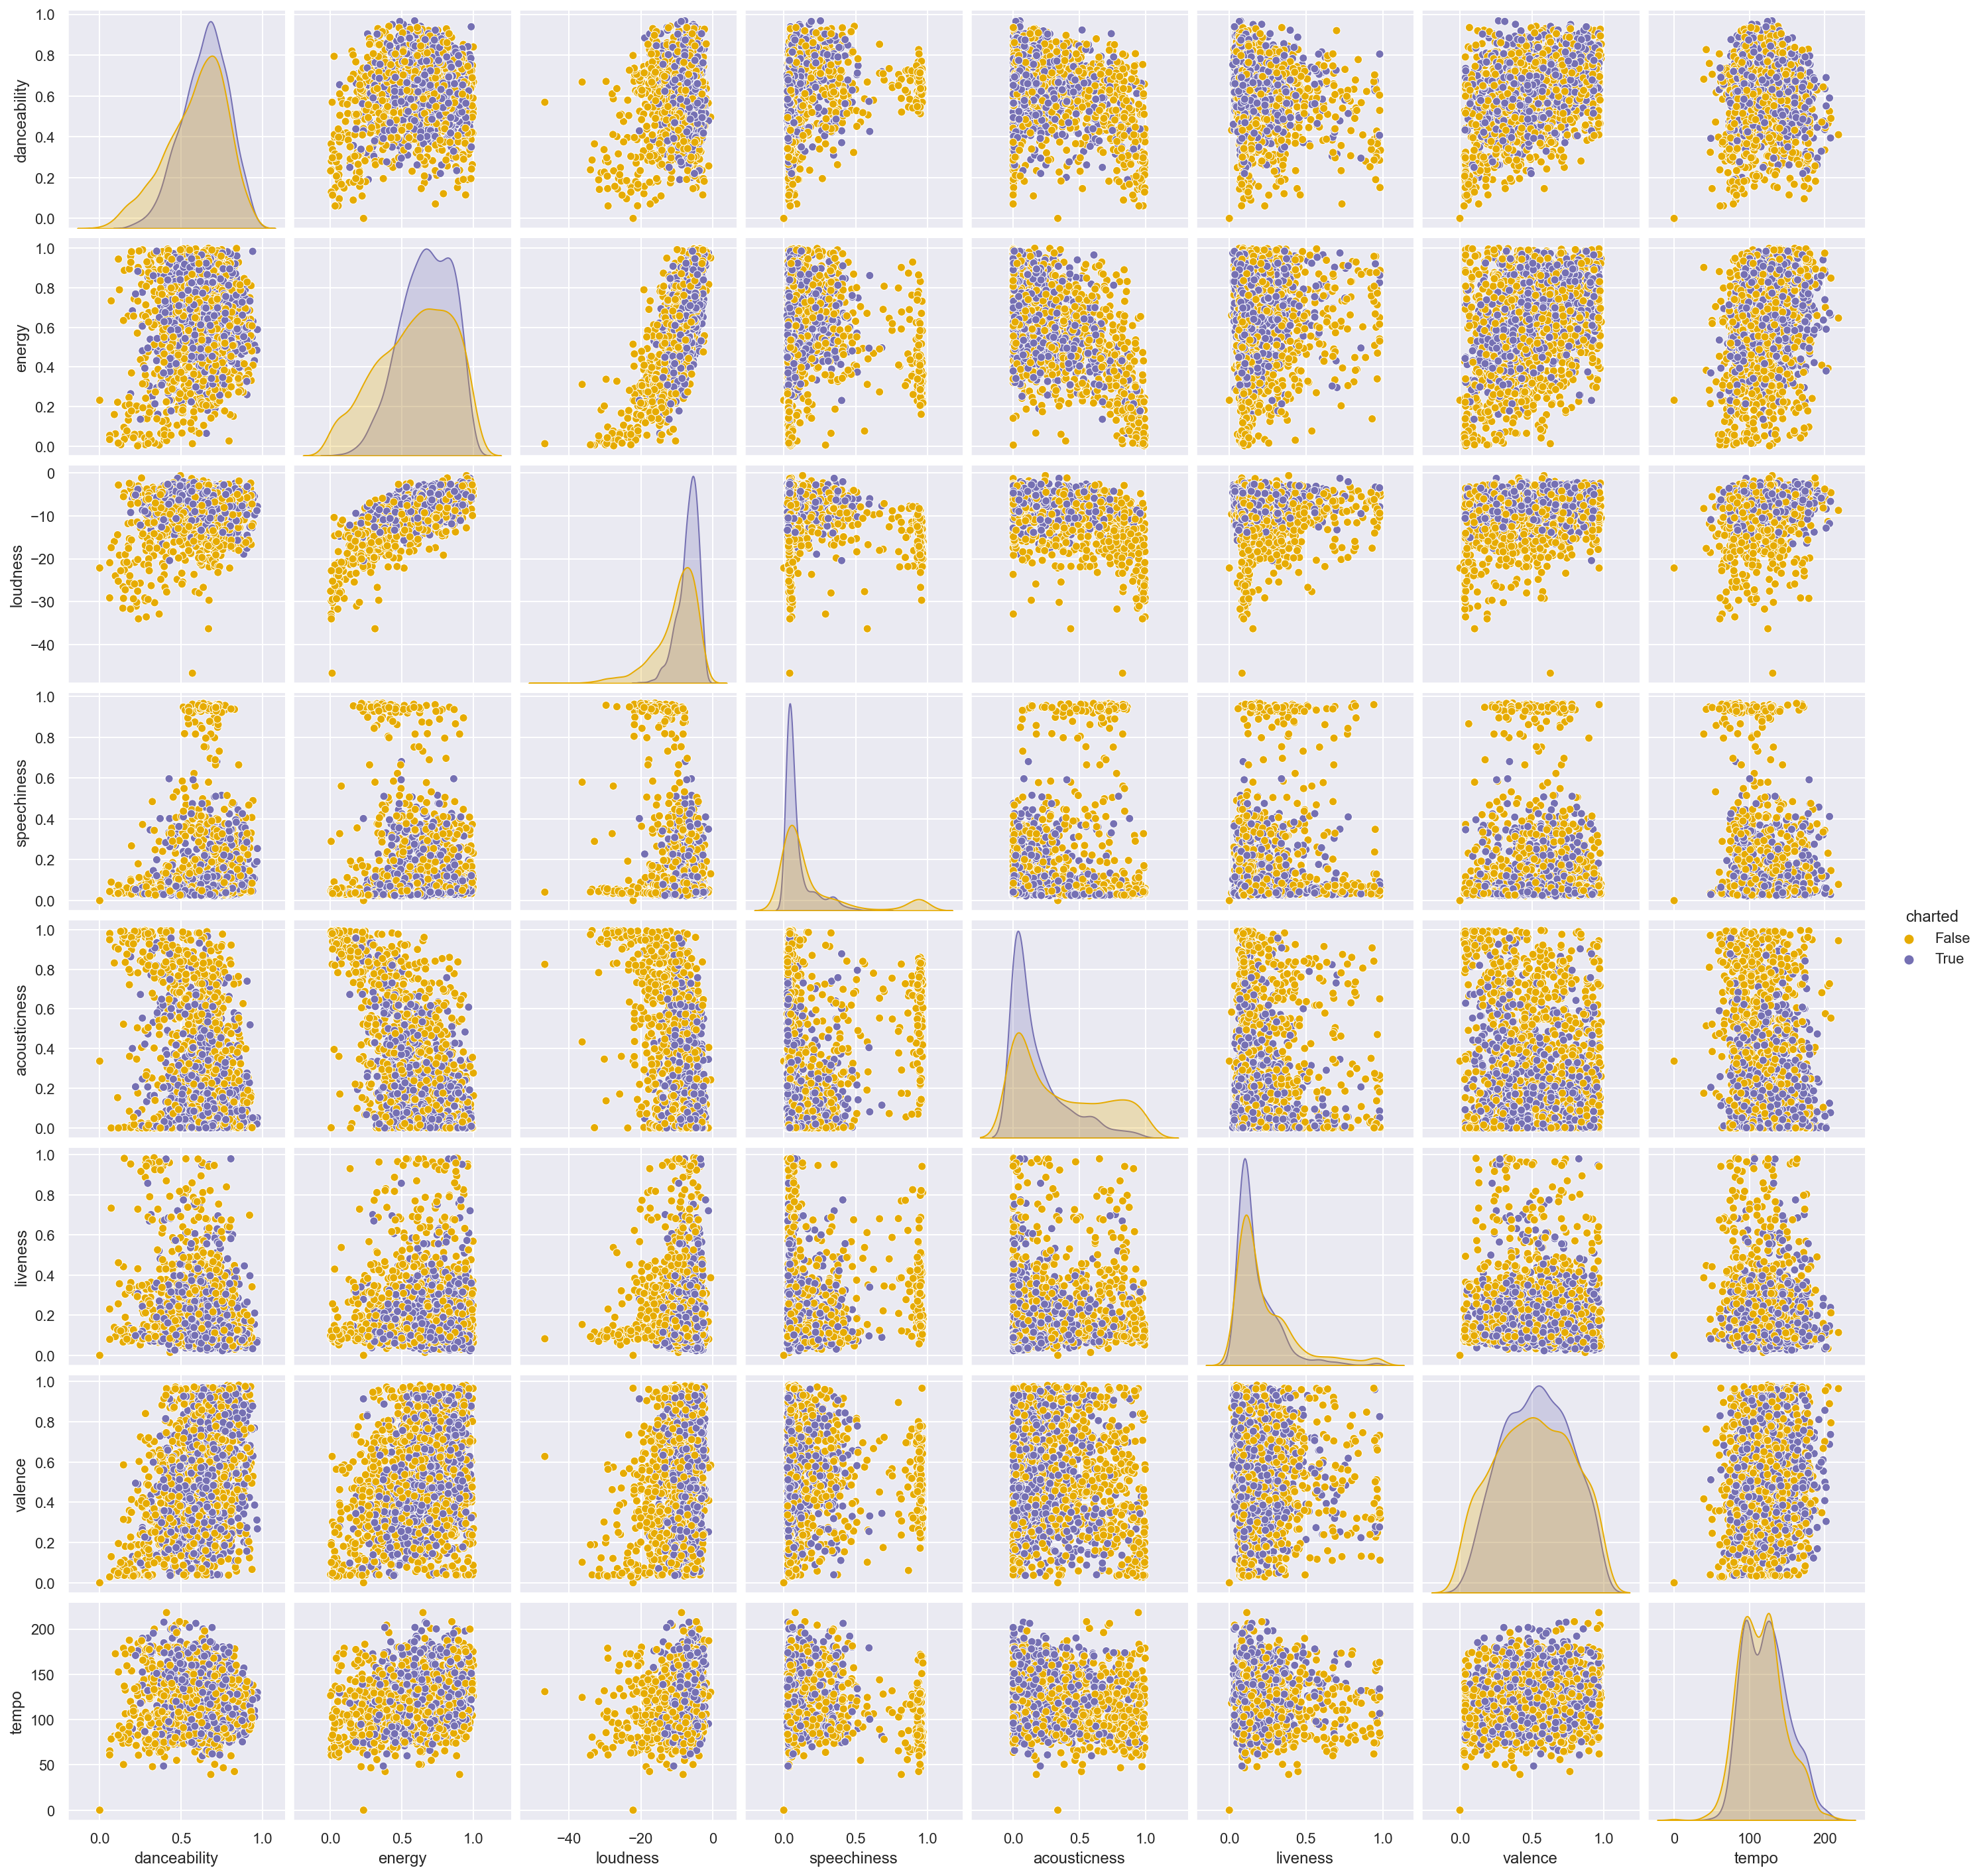

In [31]:
cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'charted']
sampledecade = final.sample(n = 2000, random_state = 52)
sb.pairplot(data = sampledecade[cols], hue = 'charted', palette = 'Dark2_r')

Multi Variate Linear Regression

In [32]:
#creating train and test sets for each year (Numerical)

x_train90 = train90.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_train90 = train90[['weeks-on-board']]
x_test90 = test90.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_test90 = test90[['weeks-on-board']]

x_train00 = train00.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_train00 = train00[['weeks-on-board']]
x_test00 = test00.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_test00 = test00[['weeks-on-board']]

x_train10 = train10.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_train10 = train10[['weeks-on-board']]
x_test10 = test10.drop(labels = ['weeks-on-board', 'charted', 'key'], axis =1)
y_test10 = test10[['weeks-on-board']]

InvalidIndexError: (slice(None, None, None), None)

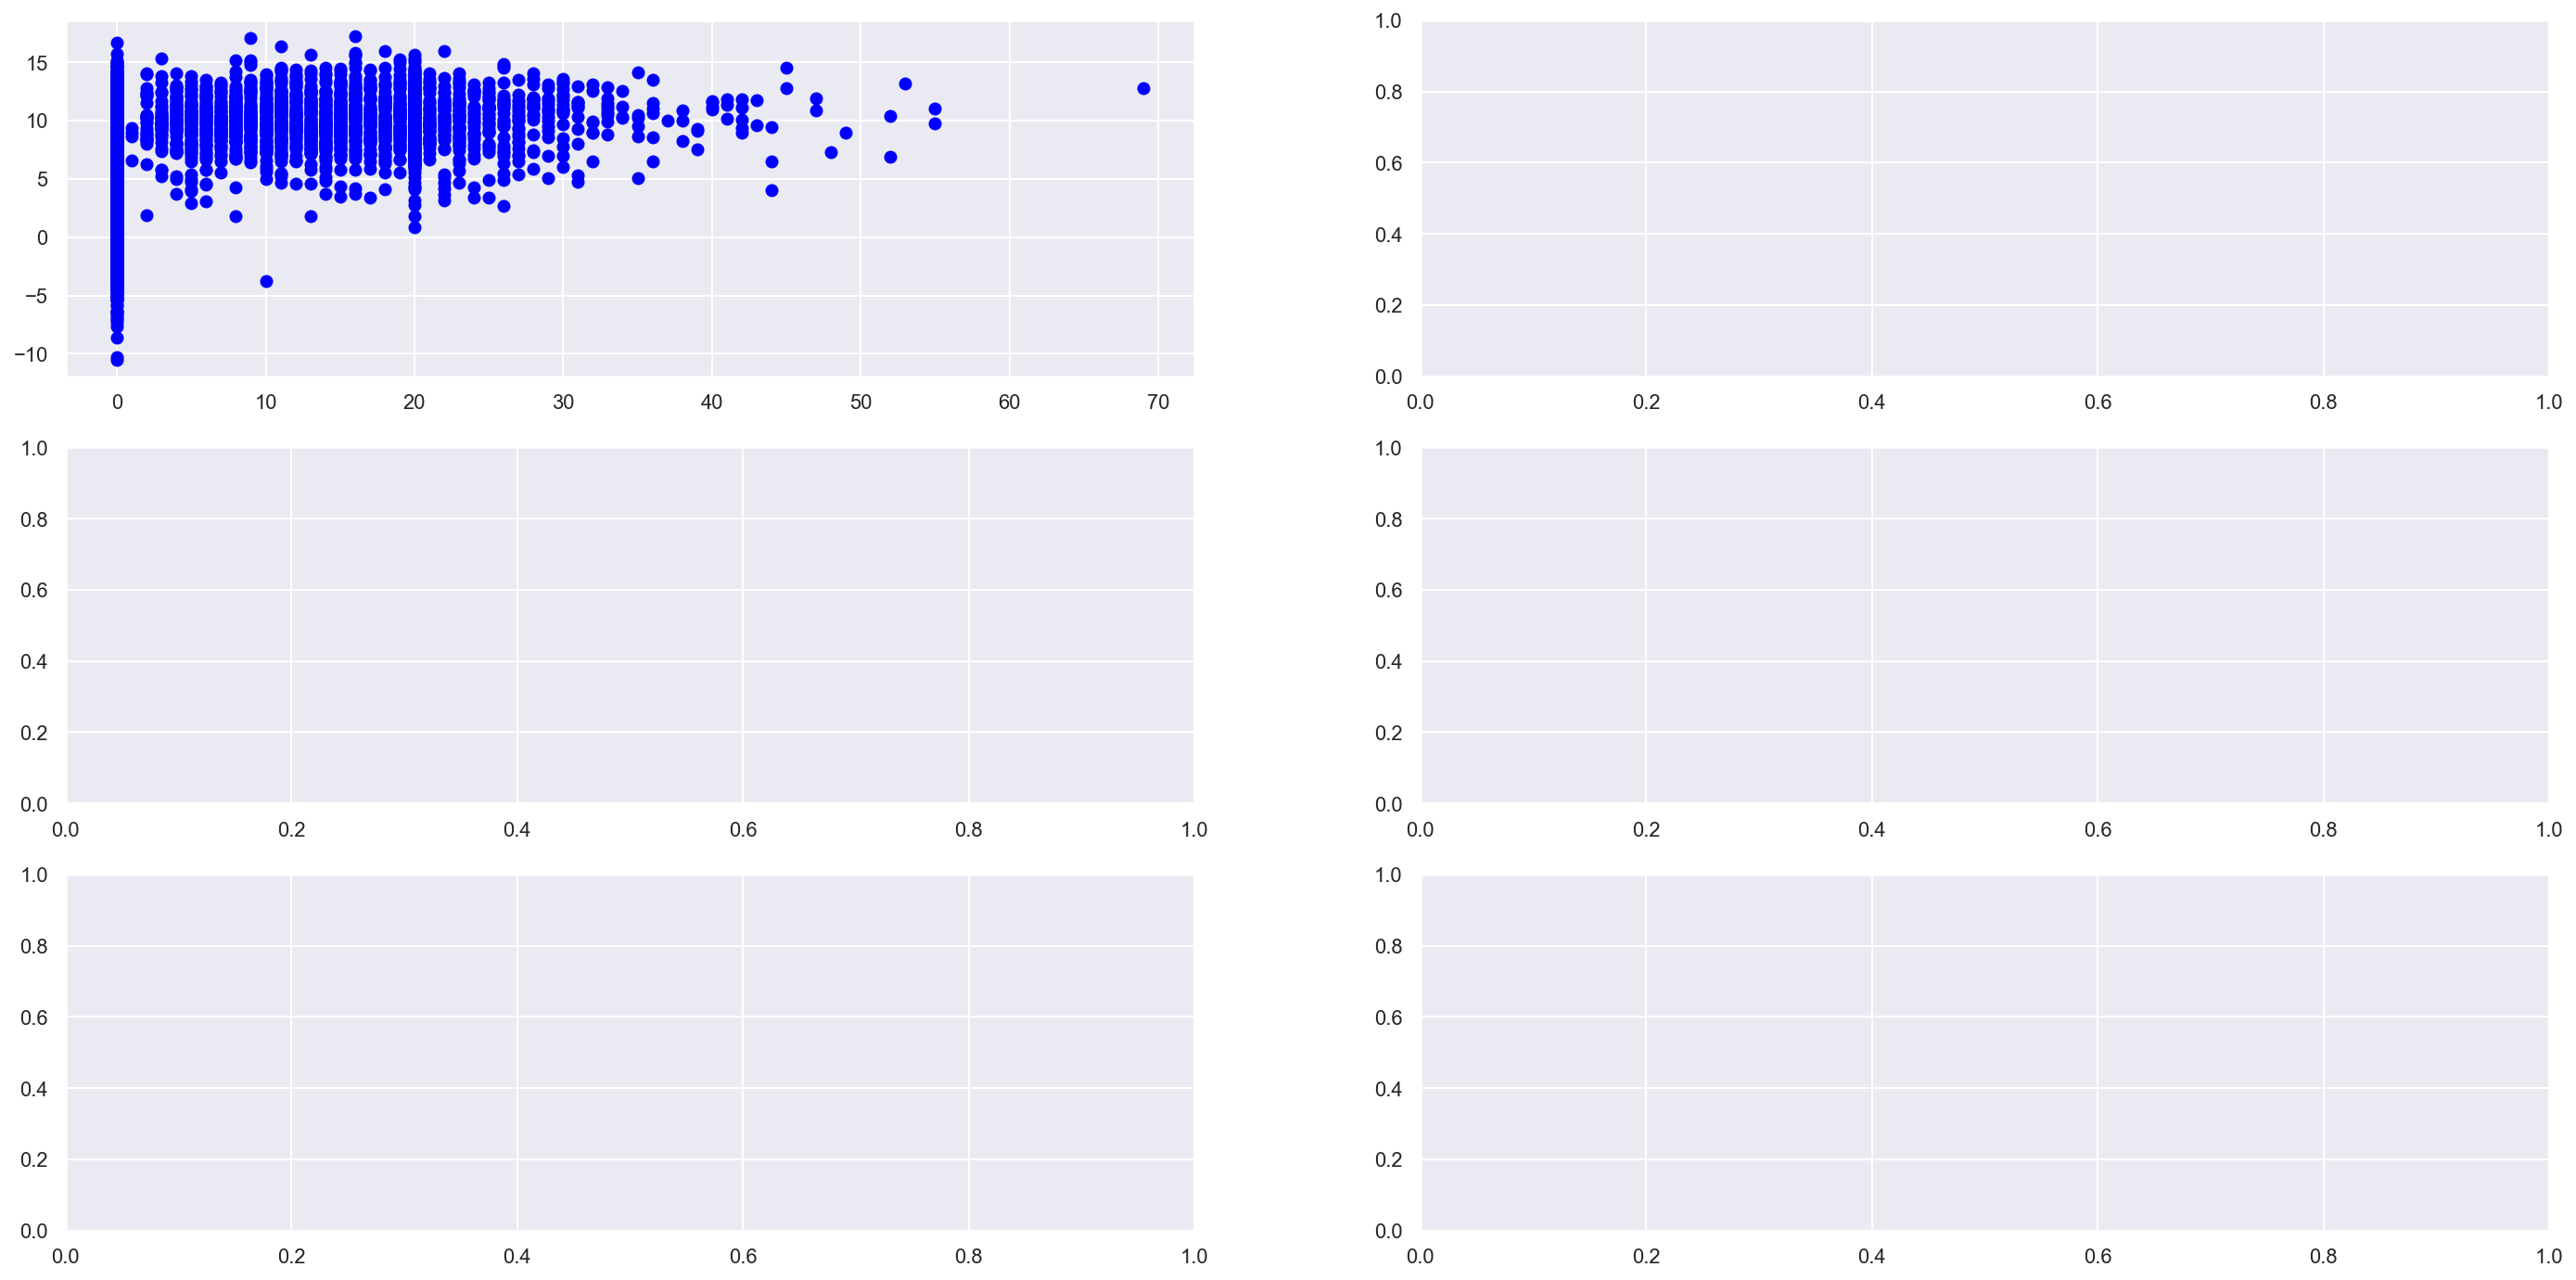

In [33]:
from sklearn.linear_model import LinearRegression

linreg90 = LinearRegression()
linreg00 = LinearRegression()
linreg10 = LinearRegression()

linreg90.fit(x_train90, y_train90)
linreg00.fit(x_train00, y_train00)
linreg10.fit(x_train10, y_train10)

linreg90.predict(x_test90)
linreg00.predict(x_test00)
linreg10.predict(x_test10)

# Predict SalePrice values corresponding to Predictors
y_train_pred90 = linreg90.predict(x_train90)
y_test_pred90 = linreg90.predict(x_test90)
y_train_pred00 = linreg10.predict(x_train00)
y_test_pred00 = linreg10.predict(x_test00)
y_train_pred10 = linreg10.predict(x_train10)
y_test_pred10 = linreg10.predict(x_test10)

# Plot the Predictions vs the True values
f, axes = plt.subplots(3, 2, figsize=(24, 12))
axes[0,0].scatter(y_train90, y_train_pred90, color = "blue")
axes[0,0].plot(y_train90, y_train90, 'r-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable - Decade 90's (Train)")
axes[0,1].scatter(y_test90, y_test_pred90, color = "green")
axes[0,1].plot(y_test90, y_test90, 'r-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable - Decade 90's  (Test)")


axes[1,0].scatter(y_train00, y_train_pred00, color = "blue")
axes[1,0].plot(y_train00, y_train00, 'r-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable - Decade 00's  (Train)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1,1].scatter(y_test00, y_test_pred00, color = "green")
axes[1,1].plot(y_test00, y_test00, 'r-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable - Decade 00's  (Test)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test)")


axes[2,0].scatter(y_train10, y_train_pred10, color = "blue")
axes[2,0].plot(y_train10, y_train10, 'r-', linewidth = 1)
axes[2,0].set_xlabel("True values of the Response Variable - Decade 10's  (Train)")
axes[2,1].scatter(y_test10, y_test_pred10, color = "green")
axes[2,1].plot(y_test10, y_test10, 'r-', linewidth = 1)
axes[2,1].set_xlabel("True values of the Response Variable - Decade 10's  (Test)")
plt.show()

from sklearn.metrics import mean_squared_error
linreg_score90 = linreg90.score(x_train90,y_train90)
linreg_score00 = linreg00.score(x_train00,y_train00)
linreg_score10 = linreg10.score(x_train10,y_train10)
print("\n")
print("Linear Regression score (90s): \t:", linreg_score90)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train90, y_train_pred90))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test90, y_test_pred90))
print("\n")

print("Linear Regression score (00s): \t:", linreg_score00)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train00, y_train_pred00))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test00, y_test_pred00))
print("\n")

print("Linear Regression score (10s): \t:", linreg_score10)
print("Mean Squared Error on train set (MSE) \t:", mean_squared_error(y_train10, y_train_pred10))
print("Mean Squared Error on test set(MSE) \t:", mean_squared_error(y_test10, y_test_pred10))



Random Forst Classifier

In [ ]:
#creating train and test sets for each year (Categorical)

x_train90 = train90.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_train90 = train90[['charted']]
x_test90 = test90.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_test90 = test90[['charted']]

x_train00 = train00.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_train00 = train00[['charted']]
x_test00 = test00.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_test00 = test00[['charted']]

x_train10 = train10.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_train10 = train10[['charted']]
x_test10 = test10.drop(labels = ['weeks-on-board', 'charted', 'key'] , axis = 1)
y_test10 = test10[['charted']]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

# Selected metric
metric_score = f1_score
metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]

# Calculate scores across all chosen metrics
def metricscores(predicts):
  tests = [y_test90, y_test00, y_test10]
  scores = pd.DataFrame(columns = ['decade', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
  for name, decade, predict in zip(['Decade 90', 'Decade 00', 'Decade 10'], predicts, tests):
    row = [name]
    for metric in metrics:
      row.append(metric(decade, predict))
    scores.loc[len(scores)] = row
  return scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def rfloop(x_train, y_train, x_test, y_test):
  min = float("-inf")
  optim_depth = 0
  for i in range(1, 32):
    RF = RandomForestClassifier(n_estimators=100, 
                                max_depth = i,
                                max_features = 'auto', 
                                min_samples_leaf = 4,
                                bootstrap = True, 
                                n_jobs = -1, 
                                random_state = 52)

    RF.fit(x_train, y_train.values.ravel())
    rf_pred = RF.predict(x_test)
    rf_score = metric_score(y_test, rf_pred)

    if rf_score > min:
      min = rf_score
      optim_depth = i
      
  return rf_score, optim_depth



RF90 = RandomForestClassifier(n_estimators=100, 
                              max_depth=5,
                              max_features='auto', 
                              min_samples_leaf=4,
                              bootstrap=True, 
                              n_jobs=-1, 
                              random_state=52)
RF00 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=52)
RF10 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=52)

RF90.fit(x_train90, y_train90.values.ravel())
RF00.fit(x_train00, y_train00.values.ravel())
RF10.fit(x_train10, y_train10.values.ravel())

rf_pred90 = RF90.predict(x_test90)
rf_pred00 = RF00.predict(x_test00)
rf_pred10 = RF10.predict(x_test10)

rf_score90 = metric_score(y_test90, rf_pred90)
rf_score00 = metric_score(y_test00, rf_pred00)
rf_score10 = metric_score(y_test10, rf_pred10)

print("\n")
print(f"F1 Score for Decade 90 : {rf_score90}")
print(f"F1 Score for Decade 00 : {rf_score00}")
print(f"F1 Score for Decade 10 : {rf_score10}")
print("\n")

In [ ]:
rf_scores = metricscores([rf_pred90, rf_pred00, rf_pred10])

temp = ["Standard Deviation"]
for column in rf_scores.columns[1:]:
  temp.append(np.std(rf_scores[column]))


rf_scores.loc[len(rf_scores)] = temp
display(rf_scores)

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(26, 8), sharex = True)
fig.suptitle('Feature Importances across decades')
axs[0].barh(RF90.feature_names_in_, RF90.feature_importances_, height = 1)
axs[0].set_title("Decade90")
axs[1].barh(RF00.feature_names_in_, RF00.feature_importances_, height = 1)
axs[1].set_title("Decade00")
axs[2].barh(RF10.feature_names_in_, RF10.feature_importances_, height = 1)
axs[2].set_title("Decade10")

plt.show()

Visualising Random Forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


f = plt.figure(figsize=(30, 20))
ax1 = f.add_subplot(3, 1, 1) # row, column, position
ax2 = f.add_subplot(3, 1, 2)
ax3 = f.add_subplot(3, 1, 3)

fig = plt.figure(figsize=(15, 3))
plot_tree(RF90.estimators_[50], ax= ax1,
          feature_names=x_train90.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax1.set_title("Decade90s", fontsize= 25)

plot_tree(RF00.estimators_[50], ax= ax2,
          feature_names=x_train00.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax2.set_title("Decade00s", fontsize= 25)

plot_tree(RF10.estimators_[50], ax= ax3,
          feature_names=x_train10.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax3.set_title("Decade10s", fontsize= 25)
plt.show()

Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression


THRESHOLD = 0.5

clf90 = LogisticRegression(class_weight="balanced")
clf90.fit(x_train90, y_train90.values.ravel())

log_preds90 = np.where(clf90.predict_proba(x_test90)[:,1] > THRESHOLD, 1, 0)

clf00 = LogisticRegression(class_weight="balanced")
clf00.fit(x_train00, y_train00.values.ravel())

log_preds00 = np.where(clf00.predict_proba(x_test00)[:,1] > THRESHOLD, 1, 0)

clf10 = LogisticRegression(class_weight="balanced")
clf10.fit(x_train10, y_train10.values.ravel())

log_preds10 = np.where(clf90.predict_proba(x_test10)[:,1] > THRESHOLD, 1, 0)

log_model_score90 = metric_score(y_test90, log_preds90)
log_model_score00 = metric_score(y_test00, log_preds00)
log_model_score10 = metric_score(y_test10, log_preds10)

In [ ]:
log_scores = metricscores([log_preds90, log_preds00, log_preds10])

display(log_scores)

Confusion Matrix over the decades(Logistic Regression)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, log_preds90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize= 25)
sb.heatmap(confusion_matrix(y_test00, log_preds00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize= 25)
sb.heatmap(confusion_matrix(y_test10, log_preds10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize= 25)

K nearest neigbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
import seaborn as sns

# creating list of K for KNN
k_list90 = k_list00 = k_list10 = list(range(1,100,2))
# creating list of cv scores
cv_scores90 = []
cv_scores00 = []
cv_scores10 = []

# perform 10-fold cross validation
for k in k_list90:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train90, y_train90.values.ravel(), cv=10, scoring='accuracy')
    cv_scores90.append(scores.mean())

for k in k_list00:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train00, y_train00.values.ravel(), cv=10, scoring='accuracy')
    cv_scores00.append(scores.mean())

for k in k_list10:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train10, y_train10.values.ravel(), cv=10, scoring='accuracy')
    cv_scores10.append(scores.mean())

# changing to misclassification error
MSE90 = [1 - x for x in cv_scores90]
MSE00 = [1 - x for x in cv_scores00]
MSE10 = [1 - x for x in cv_scores10]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list90, MSE90, label = 'Decade 90')
plt.plot(k_list00, MSE00, label = 'Decade 00')
plt.plot(k_list10, MSE10, label = 'Decade 10')

plt.show()

In [ ]:
def findmin(MSE): 
  min = 999
  minidx = 0
  for index, mse in enumerate(MSE):
      if mse < min:
        min = mse
        minidx = index
  return minidx

print(f"K-Neighbors for Decade90: {k_list90[findmin(MSE90)]}")
print(f"Score for Decade90:\t {max(cv_scores90)}")
print(f"K-Neighbors for Decade00: {k_list00[findmin(MSE00)]}")
print(f"Score for Decade00:\t {max(cv_scores00)}")
print(f"K-Neighbors for Decade10: {k_list10[findmin(MSE10)]}")
print(f"Score for Decade10:\t {max(cv_scores10)}")


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model90 = SVC()
svm_model00 = SVC()
svm_model10 = SVC()

svm_model90.fit(x_train90, y_train90.values.ravel())
svm_model00.fit(x_train00, y_train00.values.ravel())
svm_model10.fit(x_train10, y_train10.values.ravel())

svm_predict90 = svm_model90.predict(x_test90)
svm_predict00 = svm_model00.predict(x_test00)
svm_predict10 = svm_model10.predict(x_test10)

# svm_model_score90 = svm_model90.score(x_train90, y_train90)
# svm_model_score00 = svm_model00.score(x_train00, y_train00)
# svm_model_score10 = svm_model10.score(x_train10, y_train10)

svm_model_score90 = metric_score(y_test90, svm_predict90)
svm_model_score00 = metric_score(y_test00, svm_predict00)
svm_model_score10 = metric_score(y_test10, svm_predict10)

In [ ]:
print("\n")
print(f"F1 Score for Decade 90 : {svm_model_score90}")
print(f"F1 Score for Decade 00 : {svm_model_score00}")
print(f"F1 Score for Decade 10 : {svm_model_score10}")
print("\n")

In [ ]:
svm_scores = metricscores([svm_predict90, svm_predict00, svm_predict10])

temp = ["Standard Deviation"]
for column in svm_scores.columns[1:]:
  temp.append(np.std(svm_scores[column]))


svm_scores.loc[len(svm_scores)] = temp

display(svm_scores)

Confusion Matrix over the decare(SVM)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, svm_predict90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, svm_predict00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, svm_predict10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb_model90 = GaussianNB()
gnb_model00 = GaussianNB()
gnb_model10 = GaussianNB()


gnb_model90.fit(x_train90, y_train90.values.ravel())
gnb_model00.fit(x_train00, y_train00.values.ravel())
gnb_model10.fit(x_train10, y_train10.values.ravel())

gnb_predict90 = gnb_model90.predict(x_test90)
gnb_predict00 = gnb_model00.predict(x_test00)
gnb_predict10 = gnb_model10.predict(x_test10)

# gnb_model_score90 = gnb_model90.score(x_train90, y_train90)
# gnb_model_score00 = gnb_model00.score(x_train00, y_train00)
# gnb_model_score10 = gnb_model10.score(x_train10, y_train10)

gnb_model_score90 = metric_score(y_test90, gnb_predict90)
gnb_model_score00 = metric_score(y_test00, gnb_predict00)
gnb_model_score10 = metric_score(y_test10, gnb_predict10)

In [ ]:
print("\n")
print(f"F1 Score for Decade 90 : {gnb_model_score90}")
print(f"F1 Score for Decade 00 : {gnb_model_score00}")
print(f"F1 Score for Decade 10 : {gnb_model_score10}")
print("\n")

In [ ]:
gnb_scores = metricscores([gnb_predict90, gnb_predict00, gnb_predict10])

display(gnb_scores)

Confusion Matrix over the years(GNB)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, gnb_predict90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, gnb_predict00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, gnb_predict10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

Decision Tree

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier


# Decision Tree using Train Data
dectree90 = DecisionTreeClassifier(max_depth = 6)
dectree00 = DecisionTreeClassifier(max_depth = 6) 
dectree10 = DecisionTreeClassifier(max_depth = 6) 


dectree90.fit(x_train90, y_train90.values.ravel())
dectree00.fit(x_train00, y_train00.values.ravel())   
dectree10.fit(x_train10, y_train10.values.ravel())                  

# Predict Response corresponding to Predictors
y_train_pred90 = dectree90.predict(x_train90)
y_test_pred90 = dectree90.predict(x_test90)

y_train_pred00 = dectree00.predict(x_train00)
y_test_pred00 = dectree00.predict(x_test00)

y_train_pred10 = dectree10.predict(x_train10)
y_test_pred10 = dectree10.predict(x_test10)

dec_train_score90 = metric_score(y_train90, y_train_pred90)
dec_train_score00 = metric_score(y_train00, y_train_pred00)
dec_train_score10 = metric_score(y_train10, y_train_pred10)

dec_test_score90 = metric_score(y_test90, y_test_pred90)
dec_test_score00 = metric_score(y_test00, y_test_pred00)
dec_test_score10 = metric_score(y_test10, y_test_pred10)



f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 1, 1) # row, column, position
ax2 = f.add_subplot(3, 1, 2)
ax3 = f.add_subplot(3, 1, 3)

fig = plt.figure(figsize=(15, 10))
plot_tree(dectree90, ax= ax1,
          feature_names=x_train90.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax1.set_title("Decade90s", fontsize= 25)

plot_tree(dectree00, ax= ax2,
          feature_names=x_train00.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax2.set_title("Decade00s", fontsize= 25)

plot_tree(dectree10, ax= ax3,
          feature_names=x_train10.columns,
          class_names=["N", "Y"], 
          filled=True, impurity=True, 
          rounded=True)

ax3.set_title("Decade10s", fontsize= 25)
plt.show()

print("\n")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset - Decade 90s")
print("Classification Accuracy \t:", dec_train_score90)

print("Goodness of Fit of Model \tTrain Dataset - Decade 00s")
print("Classification Accuracy \t:", dec_train_score00)

print("Goodness of Fit of Model \tTrain Dataset - Decade 10s")
print("Classification Accuracy \t:", dec_train_score10)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset - Decade 90s")
print("Classification Accuracy \t:", dec_test_score90)

print("Goodness of Fit of Model \tTest Dataset - Decade 00s")
print("Classification Accuracy \t:", dec_test_score00)

print("Goodness of Fit of Model \tTest Dataset - Decade 10s")
print("Classification Accuracy \t:", dec_test_score10)
print("\n")

Confusion Matrix over the years(Decision Tree)

In [ ]:
f = plt.figure(figsize=(40, 20))
ax1 = f.add_subplot(3, 3, 1) # row, column, position
ax2 = f.add_subplot(3, 3, 2)
ax3 = f.add_subplot(3, 3, 3)

sb.heatmap(confusion_matrix(y_test90, y_test_pred90), ax=ax1, annot = True, fmt=".0f", annot_kws={"size": 18})
ax1.set_title("Decade 90s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test00, y_test_pred00), ax=ax2, annot = True, fmt=".0f", annot_kws={"size": 18})
ax2.set_title("Decade 00s", fontsize = 25)
sb.heatmap(confusion_matrix(y_test10, y_test_pred10), ax=ax3, annot = True, fmt=".0f", annot_kws={"size": 18})
ax3.set_title("Decade 10s", fontsize = 25)
plt.show()

# Conclusion

Visualing which models are more accurate based on f1 score over the decades

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"],
    y=[linreg_score90, rf_score90, log_model_score90,  max(cv_scores90), svm_model_score90, gnb_model_score90, dec_test_score90 ],
    name='Decade90',
    marker_color='indianred',
))
fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes " , "Decision Tree"],
    y=[linreg_score00, rf_score00, log_model_score00,  max(cv_scores00), svm_model_score00, gnb_model_score00, dec_test_score00],
    name='Decade00',
    marker_color='grey'
))

fig.add_trace(go.Bar(
    x=["Linear Regression", "Random Forest", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"],
    y=[linreg_score10, rf_score10, log_model_score10,  max(cv_scores10), svm_model_score10, gnb_model_score10, dec_test_score10],
    name='Decade10',
    marker_color='blue'
))
fig.update_layout(font=dict(size=12))

fig.show()

GNB and Decision tree are failing due to outliers in 2021

In [ ]:
names = ["Decade", "Linear Regression", "Random Forest", "Logistic Regression", "K Nearest Neighbours", "Support Vector Machine", "Gaussian Naive Bayes ", "Decision Tree"]
scores90 = ["Decade90", linreg_score90, rf_score90, log_model_score90,  max(cv_scores90), svm_model_score90, gnb_model_score90, dec_test_score90]
scores00 = ["Decade00", linreg_score00, rf_score00, log_model_score00,  max(cv_scores00), svm_model_score00, gnb_model_score00, dec_test_score00]
scores10 = ["Decade10", linreg_score10, rf_score10, log_model_score10,  max(cv_scores10), svm_model_score10, gnb_model_score10, dec_test_score10]

scoresdf = pd.DataFrame([scores90, scores00, scores10], columns = [names])
display(scoresdf)